## Mini_Project_01

### Dependency

In [396]:
# Preprocess
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.model_selection import train_test_split

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn import metrics

from scipy.stats import shapiro, probplot
from scipy import stats

import statsmodels.api as sm

# Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam, rmsprop

# Environmnets
import math
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [456]:
sales = pd.read_csv('../data/sales_건강음료.csv', encoding='euc-kr')

### Preprocess

In [457]:
sales["YEAR"] = sales['YM'].astype('str').str[:4].astype(int)
sales["MON"] = sales['YM'].astype('str').str[-2:].astype(int)

In [ ]:
sales = sales.drop(['YM','CATEGORY'], axis=1)

#### Classfy Dataset with Year

In [480]:
s1, s2, s3, s4, s5 = divide_by_year(sales)

In [481]:
s5.head()

,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,YEAR,MON
48,38,1828,11309,2,240416,2528,9,2013,1
49,38,1605,11309,5,217015,6667,9,2013,2
50,38,1780,11309,12,243648,4364,11,2013,3
51,38,1649,11309,15,237340,6727,8,2013,4
52,38,1670,11309,23,245068,17217,10,2013,5


#### Preview Dataset & Plot

- Correlation Analysis

In [256]:
corr = sales.corr(method = 'pearson')
corr

,YM,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,YEAR,MON
YM,1.000000,-0.387227,0.475358,0.845647,-0.021387,0.964160,0.195797,0.147752,0.999702,0.024402
ITEM_CNT,-0.387227,1.000000,-0.305669,-0.102890,0.087808,-0.388875,0.040712,-0.051467,-0.385230,-0.086508
QTY,0.475358,-0.305669,1.000000,0.352128,-0.258754,0.566744,-0.246630,0.138428,0.462642,0.526713
PRICE,0.845647,-0.102890,0.352128,1.000000,0.091919,0.874323,0.209682,0.106751,0.842508,0.138932
MAXTEMP,-0.021387,0.087808,-0.258754,0.091919,1.000000,0.026153,0.674853,-0.000733,-0.028045,0.272496
SALEDAY,0.964160,-0.388875,0.566744,0.874323,0.026153,1.000000,0.213520,0.150917,0.959921,0.185417
RAIN_DAY,0.195797,0.040712,-0.246630,0.209682,0.674853,0.213520,1.000000,-0.051351,0.192913,0.120554
HOLIDAY,0.147752,-0.051467,0.138428,0.106751,-0.000733,0.150917,-0.051351,1.000000,0.150301,-0.102624
YEAR,0.999702,-0.385230,0.462642,0.842508,-0.028045,0.959921,0.192913,0.150301,1.000000,0.000000
MON,0.024402,-0.086508,0.526713,0.138932,0.272496,0.185417,0.120554,-0.102624,0.000000,1.000000


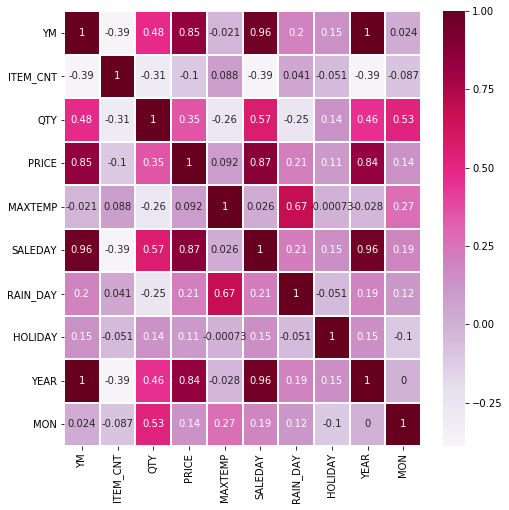

In [450]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, linewidths=1, cmap='PuRd')
plt.show()

# PuRd
# cividis
# RdPu
# OrRd
# GnBu

- Time-series Plot

By Variable

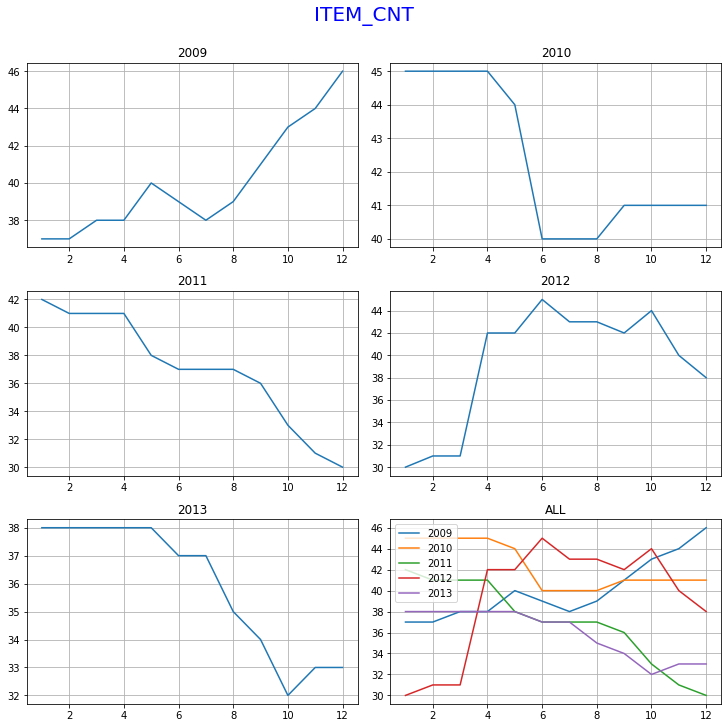

In [522]:
var_plot(sales, var_name='ITEM_CNT')

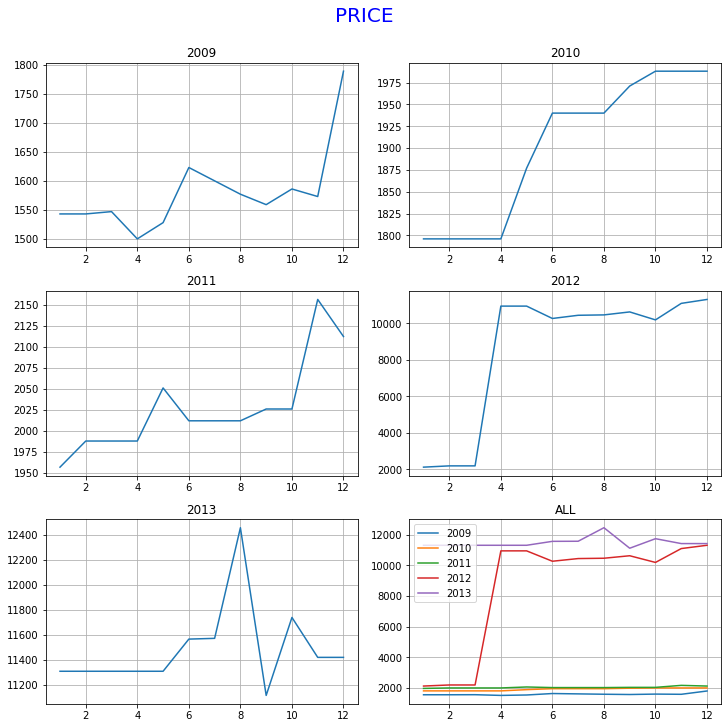

In [540]:
var_plot(sales, var_name='PRICE')

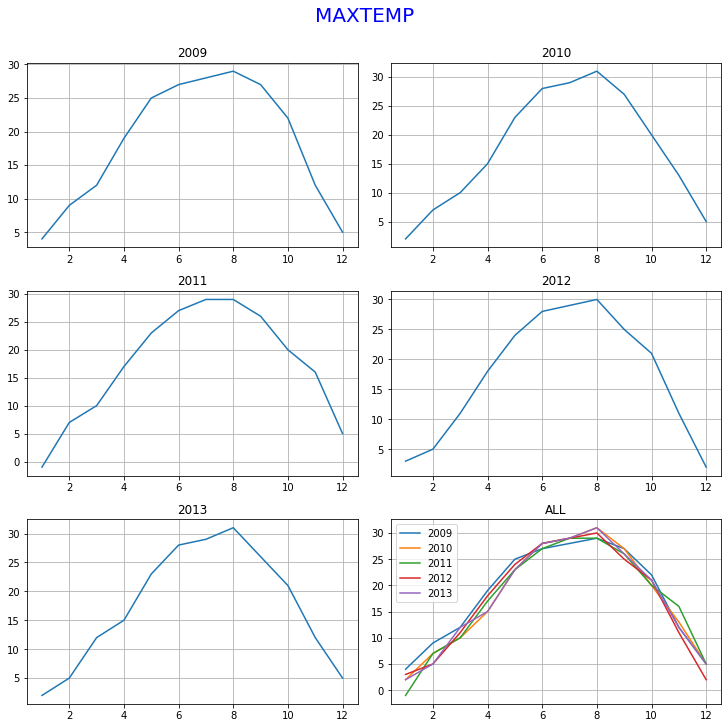

In [541]:
var_plot(sales, var_name='MAXTEMP')

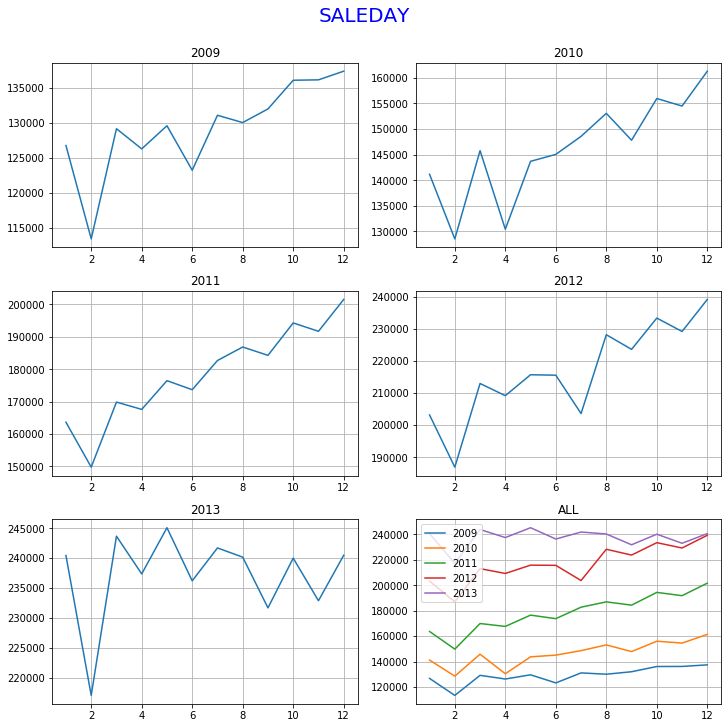

In [542]:
var_plot(sales, var_name='SALEDAY')

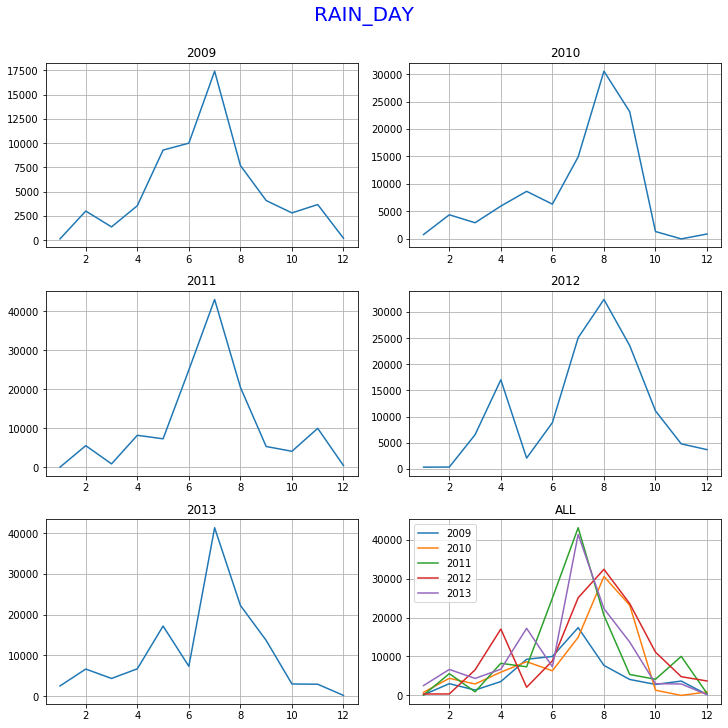

In [543]:
var_plot(sales, var_name='RAIN_DAY')

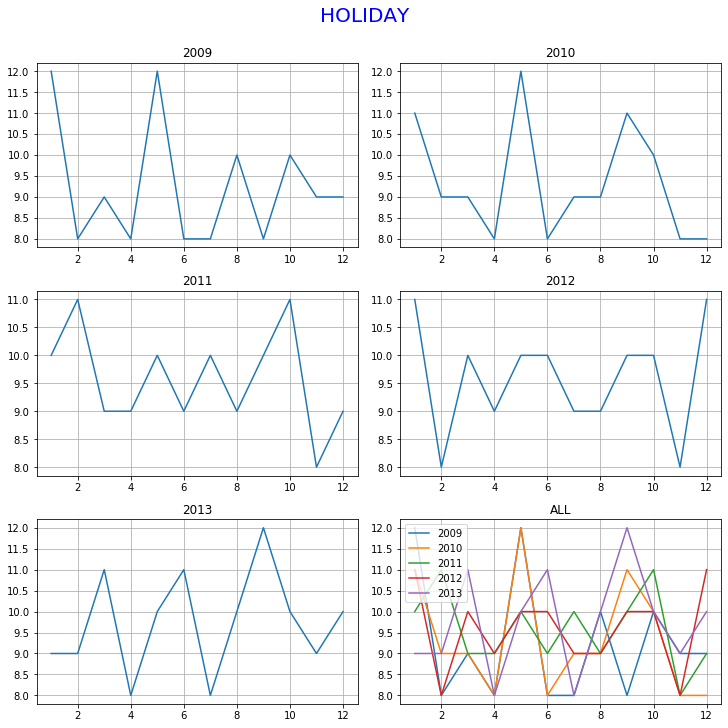

In [544]:
var_plot(sales, var_name='HOLIDAY')

Yearly

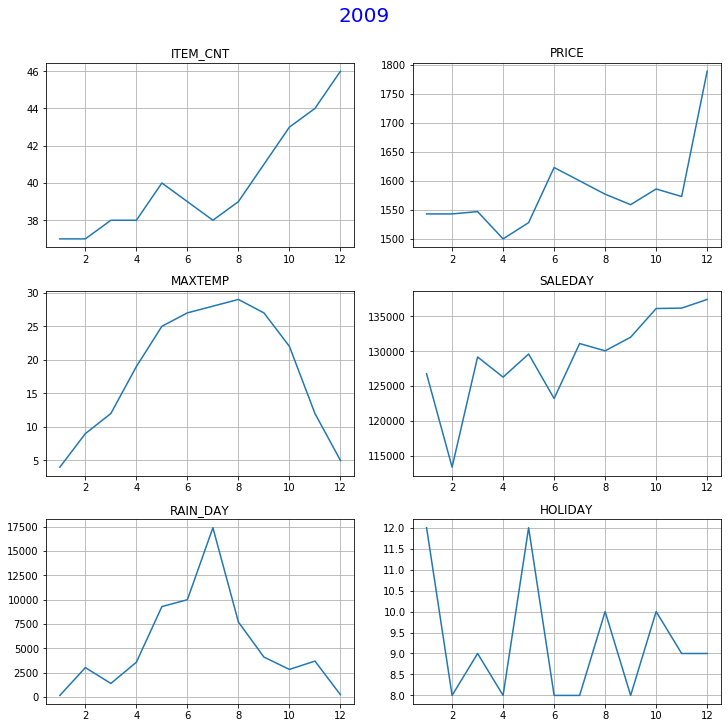

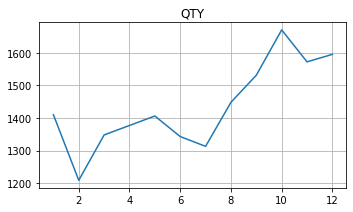

In [497]:
sales_plot(s1, type='time')

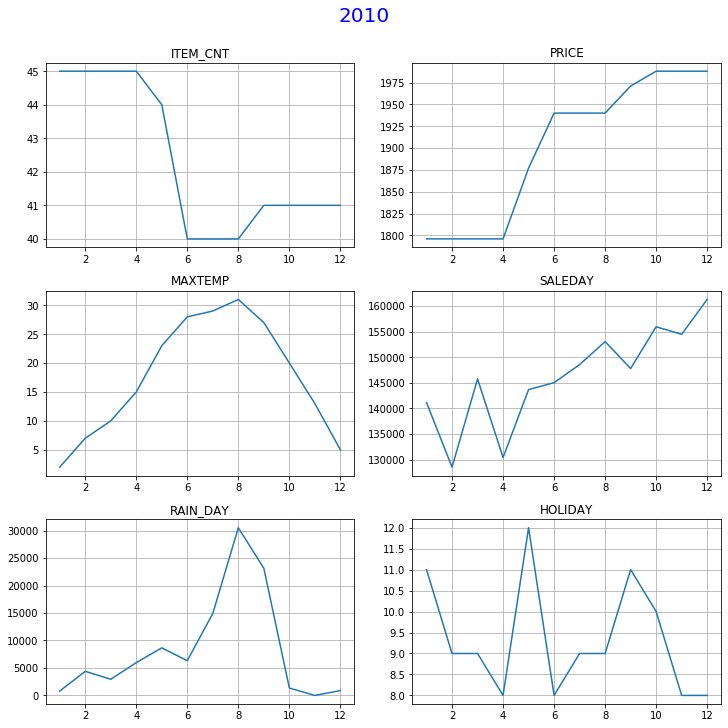

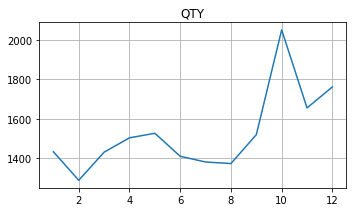

In [498]:
sales_plot(s2, type='time')

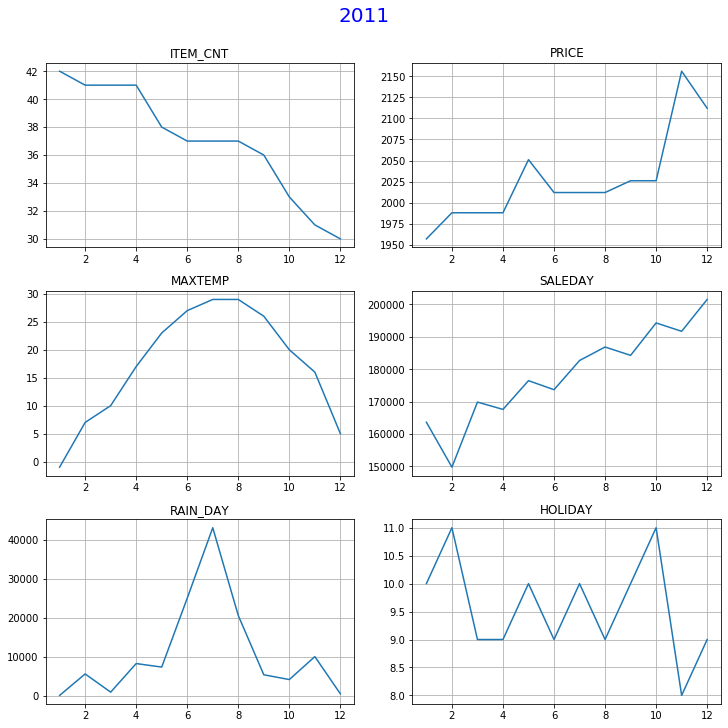

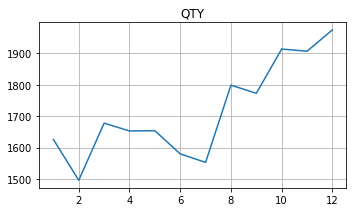

In [499]:
sales_plot(s3, type='time')

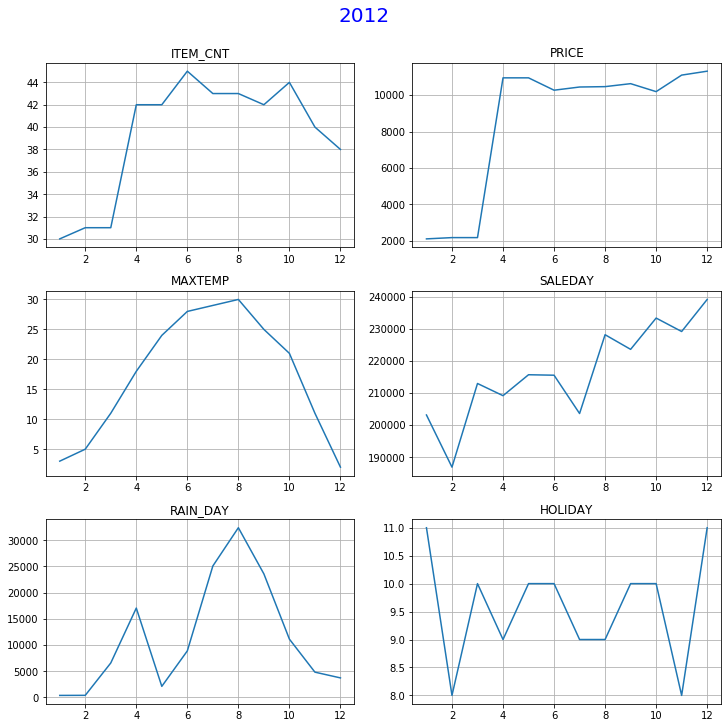

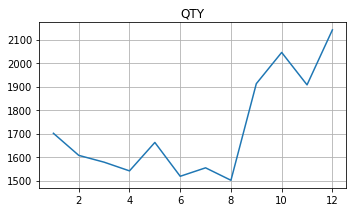

In [500]:
sales_plot(s4, type='time')

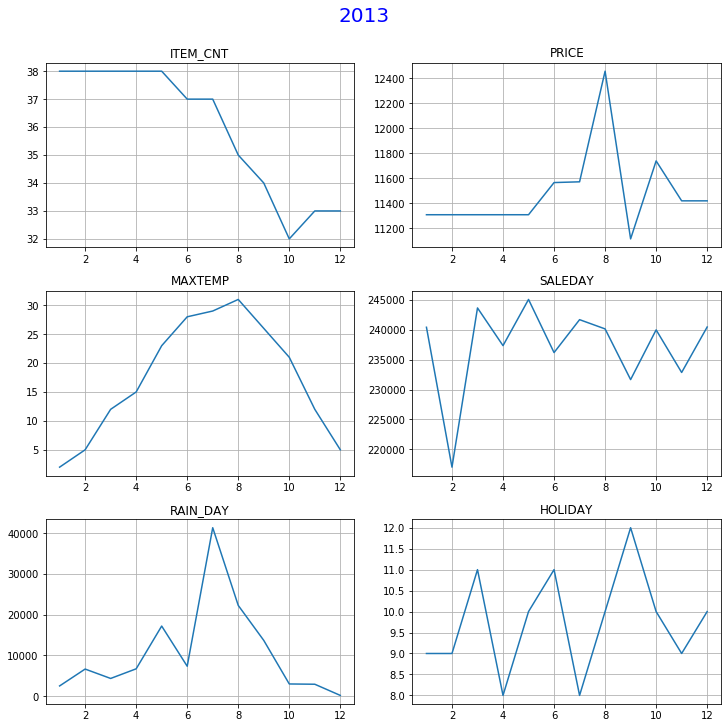

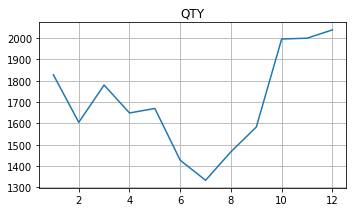

In [501]:
sales_plot(s5, type='time')

- QTY Plot

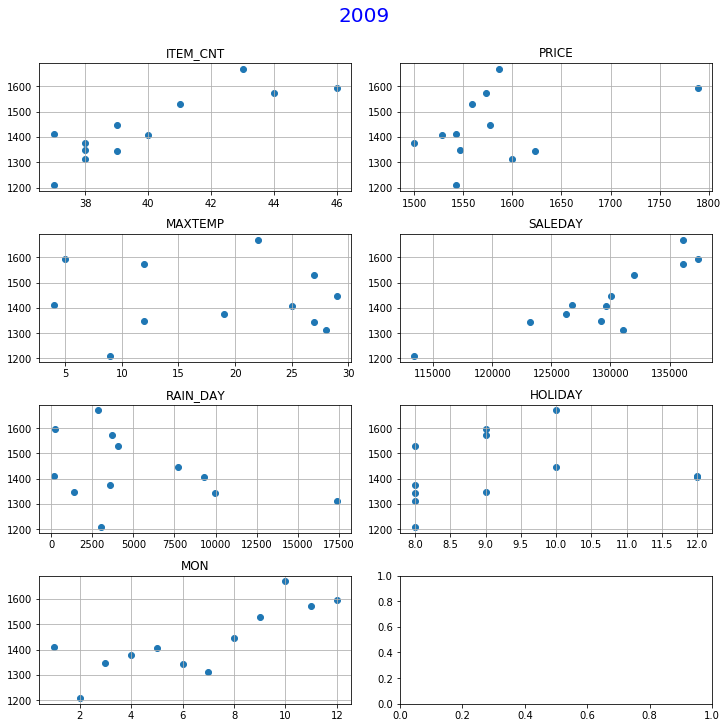

In [502]:
sales_plot(s1, type='qty')

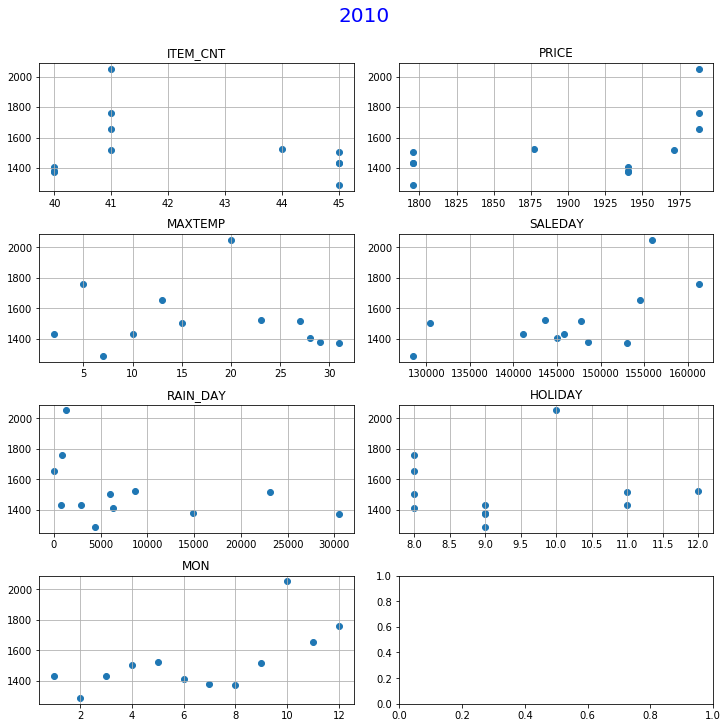

In [503]:
sales_plot(s2, type='qty')

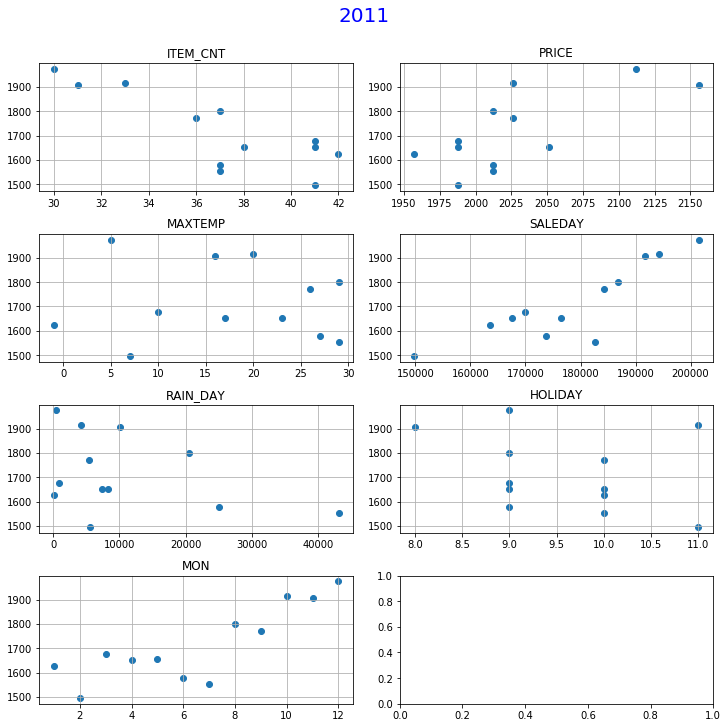

In [504]:
sales_plot(s3, type='qty')

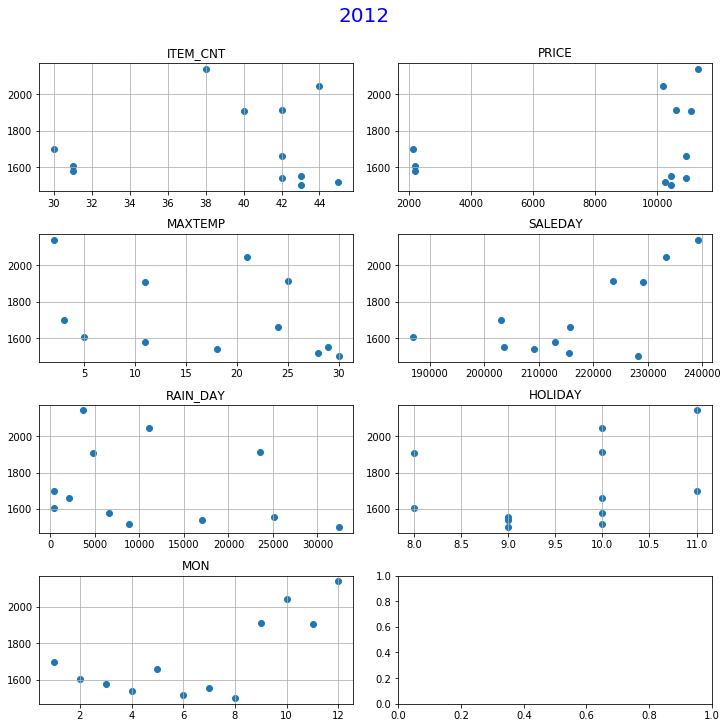

In [505]:
sales_plot(s4, type='qty')

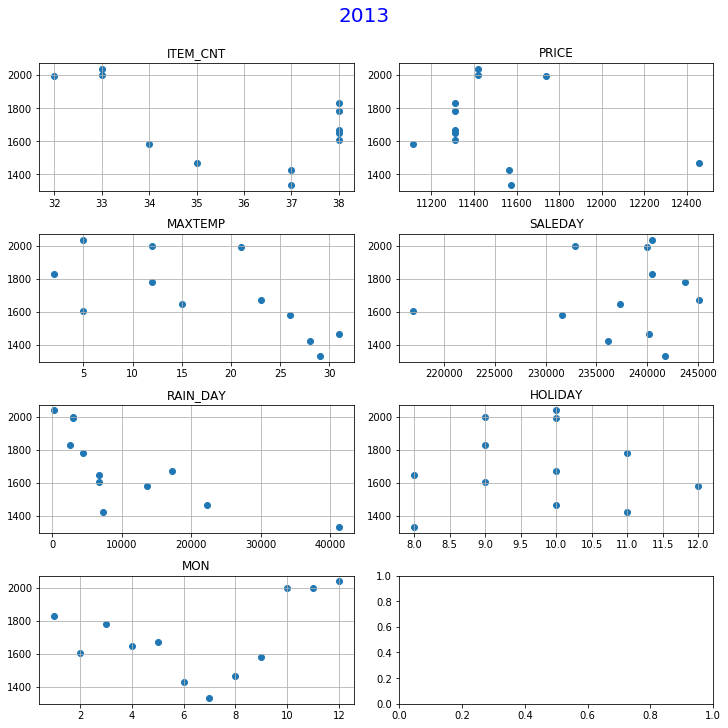

In [506]:
sales_plot(s5, type='qty')

### Data Analysis

#### Normality Test

- Shapiro Test

In [36]:
weight, p_value = shapiro(sales.QTY)
print("[Weight: %.4f, P-value: %.4f]" % (weight, p_value))

[Weight: 0.9573, P-value: 0.0347]


- Plot

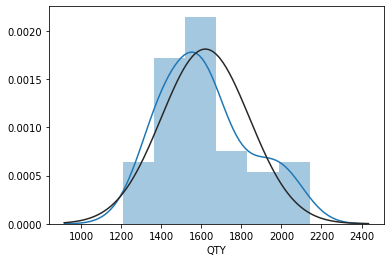

In [37]:
sns.distplot(sales.QTY, fit=stats.norm)
plt.show()

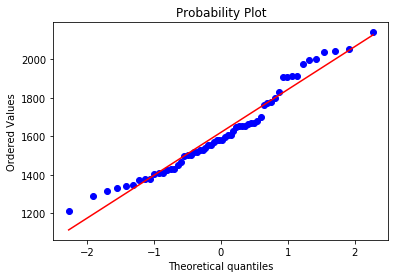

In [38]:
probplot(sales.QTY, plot=plt)
plt.show()

#### **Model 1**
 - Structure:  ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY = QTY

#### Divide Dataset into train and test

In [433]:
Y = sales['QTY']

In [434]:
X = sales.drop(['YM', 'QTY', 'CATEGORY', 'YEAR', 'MON'], axis=1)
X.head()

,ITEM_CNT,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
0,37,1543,4,126753,151,12
1,37,1543,9,113399,3014,8
2,38,1547,12,129162,1383,9
3,38,1500,19,126277,3564,8
4,40,1528,25,129584,9288,12


In [400]:
X = np.array(X, dtype=np.float32)

In [401]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=29)

In [402]:
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

#### Apply Regressions

In [403]:
model_type = ['lm', 'dt', 'svm', 'rf', 'ann']

regs1 = []
for m in model_type:
    regs1.append(apply_regs(x_train, y_train, x_test, y_test, model=m))

C:\ProgramData\Anaconda3\envs\new_ml\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\envs\new_ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_82 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_83 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_84 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 17        
Total params: 7,233
Trainable params: 7,233
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
45/45 [==============================] - 1s 12ms/step - loss: 10134764.5500 - acc: 0.0000e+00
Epoch 2/2000
45/45 [=============

45/45 [==============================] - 0s 44us/step - loss: 141015.8948 - acc: 0.0000e+00
Epoch 70/2000
45/45 [==============================] - 0s 67us/step - loss: 133133.0868 - acc: 0.0000e+00
Epoch 71/2000
45/45 [==============================] - 0s 67us/step - loss: 128775.1743 - acc: 0.0000e+00
Epoch 72/2000
45/45 [==============================] - 0s 67us/step - loss: 157107.7566 - acc: 0.0000e+00
Epoch 73/2000
45/45 [==============================] - 0s 44us/step - loss: 230582.0785 - acc: 0.0000e+00
Epoch 74/2000
45/45 [==============================] - 0s 67us/step - loss: 159166.2274 - acc: 0.0000e+00
Epoch 75/2000
45/45 [==============================] - 0s 44us/step - loss: 251447.4625 - acc: 0.0000e+00
Epoch 76/2000
45/45 [==============================] - 0s 44us/step - loss: 282958.1569 - acc: 0.0000e+00
Epoch 77/2000
45/45 [==============================] - 0s 44us/step - loss: 153593.8283 - acc: 0.0000e+00
Epoch 78/2000
45/45 [==============================] - 0s 67

45/45 [==============================] - 0s 89us/step - loss: 94295.6630 - acc: 0.0000e+00
Epoch 147/2000
45/45 [==============================] - 0s 67us/step - loss: 65385.9612 - acc: 0.0000e+00
Epoch 148/2000
45/45 [==============================] - 0s 44us/step - loss: 63396.8356 - acc: 0.0000e+00
Epoch 149/2000
45/45 [==============================] - 0s 67us/step - loss: 62889.0128 - acc: 0.0000e+00
Epoch 150/2000
45/45 [==============================] - 0s 89us/step - loss: 61708.1269 - acc: 0.0000e+00
Epoch 151/2000
45/45 [==============================] - 0s 67us/step - loss: 160612.8701 - acc: 0.0000e+00
Epoch 152/2000
45/45 [==============================] - 0s 67us/step - loss: 389081.2451 - acc: 0.0000e+00
Epoch 153/2000
45/45 [==============================] - 0s 67us/step - loss: 252252.3118 - acc: 0.0000e+00
Epoch 154/2000
45/45 [==============================] - 0s 44us/step - loss: 225601.5997 - acc: 0.0000e+00
Epoch 155/2000
45/45 [==============================] - 0

45/45 [==============================] - 0s 89us/step - loss: 83289.6175 - acc: 0.0000e+00
Epoch 224/2000
45/45 [==============================] - 0s 89us/step - loss: 74079.4389 - acc: 0.0222
Epoch 225/2000
45/45 [==============================] - 0s 44us/step - loss: 65212.2651 - acc: 0.0000e+00
Epoch 226/2000
45/45 [==============================] - 0s 89us/step - loss: 59319.7671 - acc: 0.0000e+00
Epoch 227/2000
45/45 [==============================] - 0s 44us/step - loss: 65883.4717 - acc: 0.0000e+00
Epoch 228/2000
45/45 [==============================] - 0s 67us/step - loss: 57652.5640 - acc: 0.0000e+00
Epoch 229/2000
45/45 [==============================] - 0s 67us/step - loss: 87263.3517 - acc: 0.0222
Epoch 230/2000
45/45 [==============================] - 0s 44us/step - loss: 246461.0340 - acc: 0.0000e+00
Epoch 231/2000
45/45 [==============================] - 0s 89us/step - loss: 265060.7410 - acc: 0.0000e+00
Epoch 232/2000
45/45 [==============================] - 0s 67us/ste

45/45 [==============================] - 0s 44us/step - loss: 77145.8688 - acc: 0.0000e+00
Epoch 301/2000
45/45 [==============================] - 0s 44us/step - loss: 217479.1222 - acc: 0.0000e+00
Epoch 302/2000
45/45 [==============================] - 0s 67us/step - loss: 152070.2175 - acc: 0.0000e+00
Epoch 303/2000
45/45 [==============================] - 0s 67us/step - loss: 108023.5797 - acc: 0.0000e+00
Epoch 304/2000
45/45 [==============================] - 0s 67us/step - loss: 53294.0664 - acc: 0.0000e+00
Epoch 305/2000
45/45 [==============================] - 0s 44us/step - loss: 30485.2838 - acc: 0.0222
Epoch 306/2000
45/45 [==============================] - 0s 44us/step - loss: 37899.6362 - acc: 0.0000e+00
Epoch 307/2000
45/45 [==============================] - 0s 67us/step - loss: 70642.2583 - acc: 0.0000e+00
Epoch 308/2000
45/45 [==============================] - 0s 67us/step - loss: 217002.0222 - acc: 0.0000e+00
Epoch 309/2000
45/45 [==============================] - 0s 44

45/45 [==============================] - 0s 44us/step - loss: 39982.0452 - acc: 0.0000e+00
Epoch 378/2000
45/45 [==============================] - 0s 44us/step - loss: 33888.4464 - acc: 0.0000e+00
Epoch 379/2000
45/45 [==============================] - 0s 67us/step - loss: 134815.9337 - acc: 0.0000e+00
Epoch 380/2000
45/45 [==============================] - 0s 67us/step - loss: 178514.5538 - acc: 0.0000e+00
Epoch 381/2000
45/45 [==============================] - 0s 44us/step - loss: 159390.9580 - acc: 0.0000e+00
Epoch 382/2000
45/45 [==============================] - 0s 67us/step - loss: 98773.8500 - acc: 0.0000e+00
Epoch 383/2000
45/45 [==============================] - 0s 67us/step - loss: 158894.4323 - acc: 0.0000e+00
Epoch 384/2000
45/45 [==============================] - 0s 44us/step - loss: 77393.6551 - acc: 0.0000e+00
Epoch 385/2000
45/45 [==============================] - 0s 67us/step - loss: 53426.3203 - acc: 0.0000e+00
Epoch 386/2000
45/45 [==============================] - 0

45/45 [==============================] - 0s 67us/step - loss: 30334.9438 - acc: 0.0222
Epoch 455/2000
45/45 [==============================] - 0s 89us/step - loss: 30651.7627 - acc: 0.0000e+00
Epoch 456/2000
45/45 [==============================] - 0s 67us/step - loss: 26880.4601 - acc: 0.0000e+00
Epoch 457/2000
45/45 [==============================] - 0s 44us/step - loss: 78123.7453 - acc: 0.0000e+00
Epoch 458/2000
45/45 [==============================] - 0s 44us/step - loss: 144550.5212 - acc: 0.0000e+00
Epoch 459/2000
45/45 [==============================] - 0s 67us/step - loss: 171570.6212 - acc: 0.0000e+00
Epoch 460/2000
45/45 [==============================] - 0s 67us/step - loss: 143137.1050 - acc: 0.0000e+00
Epoch 461/2000
45/45 [==============================] - 0s 44us/step - loss: 37989.5248 - acc: 0.0222
Epoch 462/2000
45/45 [==============================] - 0s 89us/step - loss: 41731.8169 - acc: 0.0000e+00
Epoch 463/2000
45/45 [==============================] - 0s 111us/s

45/45 [==============================] - 0s 111us/step - loss: 26658.2717 - acc: 0.0222
Epoch 531/2000
45/45 [==============================] - 0s 44us/step - loss: 50053.2007 - acc: 0.0000e+00
Epoch 532/2000
45/45 [==============================] - 0s 67us/step - loss: 178069.8507 - acc: 0.0000e+00
Epoch 533/2000
45/45 [==============================] - 0s 67us/step - loss: 399564.8188 - acc: 0.0000e+00
Epoch 534/2000
45/45 [==============================] - 0s 67us/step - loss: 104371.3872 - acc: 0.0000e+00
Epoch 535/2000
45/45 [==============================] - 0s 67us/step - loss: 50623.0180 - acc: 0.0000e+00
Epoch 536/2000
45/45 [==============================] - 0s 44us/step - loss: 35945.1562 - acc: 0.0000e+00
Epoch 537/2000
45/45 [==============================] - 0s 44us/step - loss: 55181.3922 - acc: 0.0000e+00
Epoch 538/2000
45/45 [==============================] - 0s 67us/step - loss: 121153.7486 - acc: 0.0000e+00
Epoch 539/2000
45/45 [==============================] - 0s 6

Epoch 607/2000
45/45 [==============================] - 0s 67us/step - loss: 38775.6078 - acc: 0.0000e+00
Epoch 608/2000
45/45 [==============================] - 0s 67us/step - loss: 136751.1663 - acc: 0.0000e+00
Epoch 609/2000
45/45 [==============================] - 0s 44us/step - loss: 325819.3979 - acc: 0.0000e+00
Epoch 610/2000
45/45 [==============================] - 0s 67us/step - loss: 73268.4266 - acc: 0.0000e+00
Epoch 611/2000
45/45 [==============================] - 0s 44us/step - loss: 42777.9414 - acc: 0.0000e+00
Epoch 612/2000
45/45 [==============================] - 0s 67us/step - loss: 55132.7719 - acc: 0.0000e+00
Epoch 613/2000
45/45 [==============================] - 0s 67us/step - loss: 36672.5055 - acc: 0.0000e+00
Epoch 614/2000
45/45 [==============================] - 0s 44us/step - loss: 28866.1643 - acc: 0.0000e+00
Epoch 615/2000
45/45 [==============================] - 0s 67us/step - loss: 66617.9635 - acc: 0.0000e+00
Epoch 616/2000
45/45 [======================

45/45 [==============================] - 0s 67us/step - loss: 37517.7012 - acc: 0.0000e+00
Epoch 685/2000
45/45 [==============================] - 0s 67us/step - loss: 27088.9064 - acc: 0.0000e+00
Epoch 686/2000
45/45 [==============================] - 0s 44us/step - loss: 39111.3956 - acc: 0.0000e+00
Epoch 687/2000
45/45 [==============================] - 0s 67us/step - loss: 69079.5608 - acc: 0.0000e+00
Epoch 688/2000
45/45 [==============================] - 0s 67us/step - loss: 186570.5604 - acc: 0.0000e+00
Epoch 689/2000
45/45 [==============================] - 0s 44us/step - loss: 166687.0825 - acc: 0.0000e+00
Epoch 690/2000
45/45 [==============================] - 0s 67us/step - loss: 53575.2646 - acc: 0.0000e+00
Epoch 691/2000
45/45 [==============================] - 0s 67us/step - loss: 99192.5115 - acc: 0.0000e+00
Epoch 692/2000
45/45 [==============================] - 0s 89us/step - loss: 57416.7151 - acc: 0.0000e+00
Epoch 693/2000
45/45 [==============================] - 0s 

45/45 [==============================] - 0s 111us/step - loss: 47797.1627 - acc: 0.0000e+00
Epoch 762/2000
45/45 [==============================] - 0s 44us/step - loss: 171461.3410 - acc: 0.0000e+00
Epoch 763/2000
45/45 [==============================] - 0s 67us/step - loss: 364978.1819 - acc: 0.0000e+00
Epoch 764/2000
45/45 [==============================] - 0s 67us/step - loss: 56990.5584 - acc: 0.0000e+00
Epoch 765/2000
45/45 [==============================] - 0s 67us/step - loss: 58492.2477 - acc: 0.0000e+00
Epoch 766/2000
45/45 [==============================] - 0s 44us/step - loss: 44164.0374 - acc: 0.0000e+00
Epoch 767/2000
45/45 [==============================] - 0s 67us/step - loss: 76590.9832 - acc: 0.0000e+00
Epoch 768/2000
45/45 [==============================] - 0s 44us/step - loss: 93099.0387 - acc: 0.0000e+00
Epoch 769/2000
45/45 [==============================] - 0s 67us/step - loss: 181399.3391 - acc: 0.0000e+00
Epoch 770/2000
45/45 [==============================] - 0

45/45 [==============================] - 0s 67us/step - loss: 129931.9688 - acc: 0.0000e+00
Epoch 838/2000
45/45 [==============================] - 0s 89us/step - loss: 285325.7979 - acc: 0.0000e+00
Epoch 839/2000
45/45 [==============================] - 0s 67us/step - loss: 58307.0612 - acc: 0.0000e+00
Epoch 840/2000
45/45 [==============================] - 0s 67us/step - loss: 27983.4804 - acc: 0.0000e+00
Epoch 841/2000
45/45 [==============================] - 0s 67us/step - loss: 38339.8989 - acc: 0.0000e+00
Epoch 842/2000
45/45 [==============================] - 0s 44us/step - loss: 53386.8943 - acc: 0.0000e+00
Epoch 843/2000
45/45 [==============================] - 0s 67us/step - loss: 111812.1038 - acc: 0.0000e+00
Epoch 844/2000
45/45 [==============================] - 0s 44us/step - loss: 82646.7615 - acc: 0.0000e+00
Epoch 845/2000
45/45 [==============================] - 0s 89us/step - loss: 72419.5550 - acc: 0.0000e+00
Epoch 846/2000
45/45 [==============================] - 0s

45/45 [==============================] - 0s 67us/step - loss: 37868.6409 - acc: 0.0000e+00
Epoch 915/2000
45/45 [==============================] - 0s 67us/step - loss: 25827.3369 - acc: 0.0000e+00
Epoch 916/2000
45/45 [==============================] - 0s 67us/step - loss: 38417.6448 - acc: 0.0222
Epoch 917/2000
45/45 [==============================] - 0s 67us/step - loss: 118550.9191 - acc: 0.0000e+00
Epoch 918/2000
45/45 [==============================] - 0s 67us/step - loss: 225182.2899 - acc: 0.0000e+00
Epoch 919/2000
45/45 [==============================] - 0s 44us/step - loss: 229336.7181 - acc: 0.0000e+00
Epoch 920/2000
45/45 [==============================] - ETA: 0s - loss: 125176.6875 - acc: 0.0000e+ - 0s 44us/step - loss: 110714.7247 - acc: 0.0000e+00
Epoch 921/2000
45/45 [==============================] - 0s 67us/step - loss: 38021.7604 - acc: 0.0000e+00
Epoch 922/2000
45/45 [==============================] - 0s 44us/step - loss: 27472.2072 - acc: 0.0000e+00
Epoch 923/2000


45/45 [==============================] - 0s 44us/step - loss: 65893.5493 - acc: 0.0000e+00
Epoch 991/2000
45/45 [==============================] - 0s 67us/step - loss: 33357.2856 - acc: 0.0000e+00
Epoch 992/2000
45/45 [==============================] - 0s 67us/step - loss: 90310.4192 - acc: 0.0000e+00
Epoch 993/2000
45/45 [==============================] - 0s 89us/step - loss: 77014.9810 - acc: 0.0000e+00
Epoch 994/2000
45/45 [==============================] - 0s 67us/step - loss: 34693.8942 - acc: 0.0000e+00
Epoch 995/2000
45/45 [==============================] - 0s 67us/step - loss: 30791.3206 - acc: 0.0000e+00
Epoch 996/2000
45/45 [==============================] - 0s 44us/step - loss: 26293.3289 - acc: 0.0000e+00
Epoch 997/2000
45/45 [==============================] - 0s 67us/step - loss: 30544.4918 - acc: 0.0000e+00
Epoch 998/2000
45/45 [==============================] - 0s 44us/step - loss: 117523.9941 - acc: 0.0000e+00
Epoch 999/2000
45/45 [==============================] - 0s 6

45/45 [==============================] - 0s 44us/step - loss: 44937.0615 - acc: 0.0000e+00
Epoch 1067/2000
45/45 [==============================] - 0s 67us/step - loss: 62221.5666 - acc: 0.0000e+00
Epoch 1068/2000
45/45 [==============================] - 0s 67us/step - loss: 49101.9503 - acc: 0.0000e+00
Epoch 1069/2000
45/45 [==============================] - 0s 44us/step - loss: 29884.8862 - acc: 0.0444
Epoch 1070/2000
45/45 [==============================] - 0s 44us/step - loss: 26283.1223 - acc: 0.0000e+00
Epoch 1071/2000
45/45 [==============================] - 0s 67us/step - loss: 25742.1168 - acc: 0.0000e+00
Epoch 1072/2000
45/45 [==============================] - 0s 44us/step - loss: 27611.4165 - acc: 0.0000e+00
Epoch 1073/2000
45/45 [==============================] - 0s 67us/step - loss: 32366.6749 - acc: 0.0000e+00
Epoch 1074/2000
45/45 [==============================] - 0s 67us/step - loss: 193424.3799 - acc: 0.0000e+00
Epoch 1075/2000
45/45 [==============================] -

45/45 [==============================] - 0s 44us/step - loss: 63034.4498 - acc: 0.0000e+00
Epoch 1143/2000
45/45 [==============================] - 0s 67us/step - loss: 50345.4766 - acc: 0.0000e+00
Epoch 1144/2000
45/45 [==============================] - 0s 67us/step - loss: 94119.8335 - acc: 0.0000e+00
Epoch 1145/2000
45/45 [==============================] - 0s 67us/step - loss: 125206.8406 - acc: 0.0000e+00
Epoch 1146/2000
45/45 [==============================] - 0s 67us/step - loss: 111925.9158 - acc: 0.0000e+00
Epoch 1147/2000
45/45 [==============================] - 0s 67us/step - loss: 120539.4030 - acc: 0.0000e+00
Epoch 1148/2000
45/45 [==============================] - 0s 67us/step - loss: 46935.9353 - acc: 0.0000e+00
Epoch 1149/2000
45/45 [==============================] - 0s 44us/step - loss: 36678.9880 - acc: 0.0000e+00
Epoch 1150/2000
45/45 [==============================] - 0s 67us/step - loss: 111418.5085 - acc: 0.0000e+00
Epoch 1151/2000
45/45 [==========================

45/45 [==============================] - 0s 44us/step - loss: 196781.6806 - acc: 0.0000e+00
Epoch 1219/2000
45/45 [==============================] - 0s 67us/step - loss: 208262.6184 - acc: 0.0000e+00
Epoch 1220/2000
45/45 [==============================] - 0s 67us/step - loss: 74868.3158 - acc: 0.0000e+00
Epoch 1221/2000
45/45 [==============================] - 0s 67us/step - loss: 48384.8940 - acc: 0.0000e+00
Epoch 1222/2000
45/45 [==============================] - 0s 44us/step - loss: 35554.0937 - acc: 0.0000e+00
Epoch 1223/2000
45/45 [==============================] - 0s 67us/step - loss: 46024.1554 - acc: 0.0000e+00
Epoch 1224/2000
45/45 [==============================] - 0s 67us/step - loss: 54291.8612 - acc: 0.0000e+00
Epoch 1225/2000
45/45 [==============================] - 0s 44us/step - loss: 55885.2240 - acc: 0.0000e+00
Epoch 1226/2000
45/45 [==============================] - 0s 67us/step - loss: 102003.0415 - acc: 0.0000e+00
Epoch 1227/2000
45/45 [===========================

45/45 [==============================] - 0s 44us/step - loss: 37264.8735 - acc: 0.0000e+00
Epoch 1295/2000
45/45 [==============================] - 0s 67us/step - loss: 34864.2342 - acc: 0.0000e+00
Epoch 1296/2000
45/45 [==============================] - 0s 44us/step - loss: 107631.1872 - acc: 0.0000e+00
Epoch 1297/2000
45/45 [==============================] - 0s 44us/step - loss: 252121.0278 - acc: 0.0000e+00
Epoch 1298/2000
45/45 [==============================] - 0s 67us/step - loss: 97022.5054 - acc: 0.0000e+00
Epoch 1299/2000
45/45 [==============================] - 0s 67us/step - loss: 74227.9582 - acc: 0.0000e+00
Epoch 1300/2000
45/45 [==============================] - 0s 44us/step - loss: 76442.0526 - acc: 0.0000e+00
Epoch 1301/2000
45/45 [==============================] - 0s 67us/step - loss: 59024.2539 - acc: 0.0000e+00
Epoch 1302/2000
45/45 [==============================] - 0s 67us/step - loss: 37344.4592 - acc: 0.0222
Epoch 1303/2000
45/45 [==============================] 

45/45 [==============================] - 0s 89us/step - loss: 26446.3708 - acc: 0.0000e+00
Epoch 1371/2000
45/45 [==============================] - 0s 67us/step - loss: 30354.1540 - acc: 0.0000e+00
Epoch 1372/2000
45/45 [==============================] - 0s 67us/step - loss: 72743.0955 - acc: 0.0000e+00
Epoch 1373/2000
45/45 [==============================] - 0s 44us/step - loss: 232582.3205 - acc: 0.0000e+00
Epoch 1374/2000
45/45 [==============================] - 0s 67us/step - loss: 125972.7434 - acc: 0.0000e+00
Epoch 1375/2000
45/45 [==============================] - ETA: 0s - loss: 165343.4531 - acc: 0.0000e+ - 0s 67us/step - loss: 145438.7582 - acc: 0.0000e+00
Epoch 1376/2000
45/45 [==============================] - 0s 67us/step - loss: 87436.1448 - acc: 0.0000e+00
Epoch 1377/2000
45/45 [==============================] - 0s 44us/step - loss: 76902.5106 - acc: 0.0000e+00
Epoch 1378/2000
45/45 [==============================] - 0s 67us/step - loss: 43805.2457 - acc: 0.0000e+00
Epoc

45/45 [==============================] - 0s 44us/step - loss: 110487.6003 - acc: 0.0000e+00
Epoch 1446/2000
45/45 [==============================] - 0s 67us/step - loss: 82177.9715 - acc: 0.0000e+00
Epoch 1447/2000
45/45 [==============================] - 0s 67us/step - loss: 74513.9189 - acc: 0.0000e+00
Epoch 1448/2000
45/45 [==============================] - 0s 67us/step - loss: 101935.4601 - acc: 0.0000e+00
Epoch 1449/2000
45/45 [==============================] - 0s 44us/step - loss: 124354.5813 - acc: 0.0000e+00
Epoch 1450/2000
45/45 [==============================] - 0s 67us/step - loss: 74172.0609 - acc: 0.0000e+00
Epoch 1451/2000
45/45 [==============================] - 0s 44us/step - loss: 40777.1628 - acc: 0.0000e+00
Epoch 1452/2000
45/45 [==============================] - 0s 67us/step - loss: 33283.5953 - acc: 0.0000e+00
Epoch 1453/2000
45/45 [==============================] - 0s 67us/step - loss: 35071.1347 - acc: 0.0000e+00
Epoch 1454/2000
45/45 [===========================

45/45 [==============================] - 0s 67us/step - loss: 146503.2410 - acc: 0.0000e+00
Epoch 1522/2000
45/45 [==============================] - 0s 67us/step - loss: 236801.1911 - acc: 0.0000e+00
Epoch 1523/2000
45/45 [==============================] - 0s 67us/step - loss: 45537.8556 - acc: 0.0000e+00
Epoch 1524/2000
45/45 [==============================] - 0s 67us/step - loss: 36393.9237 - acc: 0.0000e+00
Epoch 1525/2000
45/45 [==============================] - 0s 67us/step - loss: 29375.8473 - acc: 0.0000e+00
Epoch 1526/2000
45/45 [==============================] - 0s 67us/step - loss: 29634.8363 - acc: 0.0222
Epoch 1527/2000
45/45 [==============================] - 0s 89us/step - loss: 26166.4784 - acc: 0.0000e+00
Epoch 1528/2000
45/45 [==============================] - 0s 44us/step - loss: 25322.6104 - acc: 0.0000e+00
Epoch 1529/2000
45/45 [==============================] - 0s 67us/step - loss: 26663.6125 - acc: 0.0000e+00
Epoch 1530/2000
45/45 [==============================] 

45/45 [==============================] - 0s 44us/step - loss: 38859.5504 - acc: 0.0000e+00
Epoch 1598/2000
45/45 [==============================] - 0s 67us/step - loss: 38808.7391 - acc: 0.0000e+00
Epoch 1599/2000
45/45 [==============================] - 0s 44us/step - loss: 26225.5958 - acc: 0.0000e+00
Epoch 1600/2000
45/45 [==============================] - 0s 67us/step - loss: 29352.4942 - acc: 0.0000e+00
Epoch 1601/2000
45/45 [==============================] - 0s 44us/step - loss: 91629.6339 - acc: 0.0000e+00
Epoch 1602/2000
45/45 [==============================] - 0s 67us/step - loss: 107105.3257 - acc: 0.0222
Epoch 1603/2000
45/45 [==============================] - 0s 67us/step - loss: 130475.5780 - acc: 0.0222
Epoch 1604/2000
45/45 [==============================] - 0s 67us/step - loss: 108247.3231 - acc: 0.0000e+00
Epoch 1605/2000
45/45 [==============================] - 0s 44us/step - loss: 90619.2552 - acc: 0.0000e+00
Epoch 1606/2000
45/45 [==============================] - 0

45/45 [==============================] - 0s 67us/step - loss: 72124.3435 - acc: 0.0000e+00
Epoch 1674/2000
45/45 [==============================] - 0s 44us/step - loss: 25812.1063 - acc: 0.0000e+00
Epoch 1675/2000
45/45 [==============================] - 0s 67us/step - loss: 27318.1692 - acc: 0.0000e+00
Epoch 1676/2000
45/45 [==============================] - 0s 67us/step - loss: 38070.1470 - acc: 0.0000e+00
Epoch 1677/2000
45/45 [==============================] - 0s 44us/step - loss: 30611.4593 - acc: 0.0000e+00
Epoch 1678/2000
45/45 [==============================] - 0s 44us/step - loss: 47509.5927 - acc: 0.0000e+00
Epoch 1679/2000
45/45 [==============================] - 0s 67us/step - loss: 212996.2667 - acc: 0.0000e+00
Epoch 1680/2000
45/45 [==============================] - 0s 67us/step - loss: 130162.2128 - acc: 0.0000e+00
Epoch 1681/2000
45/45 [==============================] - 0s 44us/step - loss: 56289.0372 - acc: 0.0000e+00
Epoch 1682/2000
45/45 [============================

45/45 [==============================] - 0s 67us/step - loss: 26122.9655 - acc: 0.0000e+00
Epoch 1750/2000
45/45 [==============================] - 0s 44us/step - loss: 26954.6940 - acc: 0.0000e+00
Epoch 1751/2000
45/45 [==============================] - 0s 44us/step - loss: 58634.9417 - acc: 0.0000e+00
Epoch 1752/2000
45/45 [==============================] - 0s 67us/step - loss: 219150.9156 - acc: 0.0000e+00
Epoch 1753/2000
45/45 [==============================] - 0s 89us/step - loss: 78111.4115 - acc: 0.0000e+00
Epoch 1754/2000
45/45 [==============================] - 0s 44us/step - loss: 125419.6854 - acc: 0.0000e+00
Epoch 1755/2000
45/45 [==============================] - 0s 67us/step - loss: 53333.8890 - acc: 0.0000e+00
Epoch 1756/2000
45/45 [==============================] - 0s 44us/step - loss: 40561.6878 - acc: 0.0000e+00
Epoch 1757/2000
45/45 [==============================] - 0s 44us/step - loss: 59242.9622 - acc: 0.0000e+00
Epoch 1758/2000
45/45 [============================

45/45 [==============================] - 0s 44us/step - loss: 66684.1997 - acc: 0.0000e+00
Epoch 1826/2000
45/45 [==============================] - 0s 67us/step - loss: 35311.8182 - acc: 0.0000e+00
Epoch 1827/2000
45/45 [==============================] - 0s 67us/step - loss: 32739.4984 - acc: 0.0000e+00
Epoch 1828/2000
45/45 [==============================] - 0s 44us/step - loss: 40861.4831 - acc: 0.0000e+00
Epoch 1829/2000
45/45 [==============================] - 0s 44us/step - loss: 60557.0165 - acc: 0.0000e+00
Epoch 1830/2000
45/45 [==============================] - 0s 44us/step - loss: 121873.1972 - acc: 0.0000e+00
Epoch 1831/2000
45/45 [==============================] - 0s 89us/step - loss: 133949.4273 - acc: 0.0000e+00
Epoch 1832/2000
45/45 [==============================] - 0s 44us/step - loss: 114835.1934 - acc: 0.0000e+00
Epoch 1833/2000
45/45 [==============================] - 0s 67us/step - loss: 60159.6783 - acc: 0.0000e+00
Epoch 1834/2000
45/45 [===========================

45/45 [==============================] - 0s 67us/step - loss: 39764.2739 - acc: 0.0000e+00
Epoch 1902/2000
45/45 [==============================] - 0s 67us/step - loss: 122255.6035 - acc: 0.0000e+00
Epoch 1903/2000
45/45 [==============================] - 0s 44us/step - loss: 136583.0028 - acc: 0.0000e+00
Epoch 1904/2000
45/45 [==============================] - 0s 67us/step - loss: 87026.0814 - acc: 0.0000e+00
Epoch 1905/2000
45/45 [==============================] - 0s 44us/step - loss: 45074.5036 - acc: 0.0000e+00
Epoch 1906/2000
45/45 [==============================] - 0s 89us/step - loss: 32874.3987 - acc: 0.0000e+00
Epoch 1907/2000
45/45 [==============================] - 0s 67us/step - loss: 25941.5910 - acc: 0.0000e+00
Epoch 1908/2000
45/45 [==============================] - 0s 67us/step - loss: 54253.8497 - acc: 0.0000e+00
Epoch 1909/2000
45/45 [==============================] - 0s 44us/step - loss: 141479.7833 - acc: 0.0000e+00
Epoch 1910/2000
45/45 [===========================

45/45 [==============================] - 0s 67us/step - loss: 100392.9906 - acc: 0.0000e+00
Epoch 1978/2000
45/45 [==============================] - 0s 67us/step - loss: 93521.8934 - acc: 0.0000e+00
Epoch 1979/2000
45/45 [==============================] - 0s 67us/step - loss: 107514.6514 - acc: 0.0000e+00
Epoch 1980/2000
45/45 [==============================] - 0s 44us/step - loss: 55435.5144 - acc: 0.0000e+00
Epoch 1981/2000
45/45 [==============================] - 0s 67us/step - loss: 59245.9285 - acc: 0.0000e+00
Epoch 1982/2000
45/45 [==============================] - 0s 67us/step - loss: 117055.6214 - acc: 0.0000e+00
Epoch 1983/2000
45/45 [==============================] - 0s 67us/step - loss: 101475.2613 - acc: 0.0000e+00
Epoch 1984/2000
45/45 [==============================] - 0s 44us/step - loss: 26111.4220 - acc: 0.0000e+00
Epoch 1985/2000
45/45 [==============================] - 0s 67us/step - loss: 25479.8511 - acc: 0.0000e+00
Epoch 1986/2000
45/45 [==========================

#### Model Evaluation

- Linear Regression summary

In [404]:
model = regs1[0][1]
y_pred = regs1[0][2]

result1 = regression_results(model, y_test, y_pred)
result1

coefficients:  8.046592 -0.04301148 1.1100549 0.008121677 -0.008405061 1.6154599
explained_variance:  0.4252
mean_squared_log_error:  0.0072
r2:  0.3722
MAE:  111.4135
MSE:  20582.332
RMSE:  143.4654


In [405]:
lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              760.0
Date:                Fri, 30 Aug 2019   Prob (F-statistic):                    8.71e-39
Time:                        12:48:59   Log-Likelihood:                         -289.75
No. Observations:                  45   AIC:                                      591.5
Df Residuals:                      39   BIC:                                      602.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.4573      3.800      2.489      0.017       1.772      17.143
x2            -0.0450      0.010     -4.426      0.000      -0.066      -0.024
x3             1.1832      3.286      0.360      0.721      -5.464       7.831
x4             0.0084      0.001      8.024      0.000       0.006       0.011
x5            -0.0085      0.003     -2.683      0.011      -0.015      -0.002
x6             2.8014     20.105      0.139      0.890     -37.864      43.467
==============================================================================
Omnibus:                        1.083   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.401
Skew:                           0.153   Prob(JB):                        0.818
Kurtosis:                       3.346   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Compare Regressions

In [406]:
for reg in regs1:
    print(f"[ Model: {reg[0]:25} | RMSE: {reg[3]:.4f} ]")

[ Model: LinearRegression          | RMSE: 143.4654 ]
[ Model: DecisionTreeRegressor     | RMSE: 221.1336 ]
[ Model: SVR                       | RMSE: 181.0748 ]
[ Model: RandomForestRegressor     | RMSE: 151.5137 ]
[ Model: ArtificialNeuralNetwork   | RMSE: 233.7599 ]


In [407]:
table1 = view_table(regs1)
table1

,Regression,RMSE,R2,Adj_R2
1,LinearRegression,143.4654,0.3722,-0.0987
2,DecisionTreeRegressor,221.1336,-0.4916,-1.6102
3,SVR,181.0748,-0.0001,-0.7502
4,RandomForestRegressor,151.5137,0.2998,-0.2254
5,ArtificialNeuralNetwork,233.7599,-0.6668,-1.9168


#### **Model 2**
 - Structure: ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY + **MON** = QTY

In [408]:
X = sales.drop(['YM', 'QTY', 'CATEGORY', 'YEAR'], axis=1)
X.head()

,ITEM_CNT,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,MON
0,37,1543,4,126753,151,12,1
1,37,1543,9,113399,3014,8,2
2,38,1547,12,129162,1383,9,3
3,38,1500,19,126277,3564,8,4
4,40,1528,25,129584,9288,12,5


In [409]:
X = np.array(X, dtype=np.float32)

In [410]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=29)

In [411]:
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [412]:
model_type = ['lm', 'dt', 'svm', 'rf', 'ann']

regs2 = []
for m in model_type:
    regs2.append(apply_regs(x_train, y_train, x_test, y_test, model=m))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_87 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_88 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_89 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 17        
Total params: 7,297
Trainable params: 7,297
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\envs\new_ml\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\envs\new_ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Epoch 1/2000
45/45 [==============================] - 1s 15ms/step - loss: 1114477.2153 - acc: 0.0000e+00
Epoch 2/2000
45/45 [==============================] - 0s 44us/step - loss: 742119.6389 - acc: 0.0000e+00
Epoch 3/2000
45/45 [==============================] - 0s 89us/step - loss: 737641.3549 - acc: 0.0000e+00
Epoch 4/2000
45/45 [==============================] - 0s 67us/step - loss: 490909.0181 - acc: 0.0000e+00
Epoch 5/2000
45/45 [==============================] - 0s 67us/step - loss: 634321.6701 - acc: 0.0000e+00
Epoch 6/2000
45/45 [==============================] - 0s 67us/step - loss: 414254.0028 - acc: 0.0000e+00
Epoch 7/2000
45/45 [==============================] - 0s 67us/step - loss: 374546.0028 - acc: 0.0000e+00
Epoch 8/2000
45/45 [==============================] - 0s 44us/step - loss: 290340.3559 - acc: 0.0000e+00
Epoch 9/2000
45/45 [==============================] - 0s 67us/step - loss: 235526.0538 - acc: 0.0000e+00
Epoch 10/2000
45/45 [==============================] -

45/45 [==============================] - 0s 67us/step - loss: 97586.8052 - acc: 0.0000e+00
Epoch 79/2000
45/45 [==============================] - 0s 67us/step - loss: 92041.3277 - acc: 0.0000e+00
Epoch 80/2000
45/45 [==============================] - 0s 67us/step - loss: 94714.4394 - acc: 0.0222
Epoch 81/2000
45/45 [==============================] - 0s 67us/step - loss: 161767.3292 - acc: 0.0000e+00
Epoch 82/2000
45/45 [==============================] - 0s 44us/step - loss: 264559.9219 - acc: 0.0000e+00
Epoch 83/2000
45/45 [==============================] - 0s 67us/step - loss: 112419.7323 - acc: 0.0000e+00
Epoch 84/2000
45/45 [==============================] - 0s 89us/step - loss: 118581.0342 - acc: 0.0000e+00
Epoch 85/2000
45/45 [==============================] - 0s 89us/step - loss: 88223.5720 - acc: 0.0000e+00
Epoch 86/2000
45/45 [==============================] - 0s 89us/step - loss: 246947.2694 - acc: 0.0000e+00
Epoch 87/2000
45/45 [==============================] - 0s 111us/step

45/45 [==============================] - 0s 67us/step - loss: 156441.5465 - acc: 0.0000e+00
Epoch 155/2000
45/45 [==============================] - 0s 67us/step - loss: 79538.0887 - acc: 0.0000e+00
Epoch 156/2000
45/45 [==============================] - 0s 89us/step - loss: 69351.5578 - acc: 0.0000e+00
Epoch 157/2000
45/45 [==============================] - 0s 67us/step - loss: 69239.1709 - acc: 0.0000e+00
Epoch 158/2000
45/45 [==============================] - 0s 67us/step - loss: 169535.5007 - acc: 0.0000e+00
Epoch 159/2000
45/45 [==============================] - 0s 67us/step - loss: 113714.2418 - acc: 0.0000e+00
Epoch 160/2000
45/45 [==============================] - 0s 44us/step - loss: 72512.9684 - acc: 0.0000e+00
Epoch 161/2000
45/45 [==============================] - 0s 44us/step - loss: 101398.2620 - acc: 0.0000e+00
Epoch 162/2000
45/45 [==============================] - 0s 44us/step - loss: 71524.3960 - acc: 0.0000e+00
Epoch 163/2000
45/45 [==============================] - 0

45/45 [==============================] - 0s 44us/step - loss: 48269.5876 - acc: 0.0000e+00
Epoch 232/2000
45/45 [==============================] - 0s 44us/step - loss: 48854.0044 - acc: 0.0222
Epoch 233/2000
45/45 [==============================] - 0s 67us/step - loss: 47722.9974 - acc: 0.0000e+00
Epoch 234/2000
45/45 [==============================] - 0s 67us/step - loss: 124602.4816 - acc: 0.0000e+00
Epoch 235/2000
45/45 [==============================] - 0s 44us/step - loss: 193069.5819 - acc: 0.0000e+00
Epoch 236/2000
45/45 [==============================] - 0s 67us/step - loss: 55047.7246 - acc: 0.0000e+00
Epoch 237/2000
45/45 [==============================] - 0s 67us/step - loss: 110337.7521 - acc: 0.0000e+00
Epoch 238/2000
45/45 [==============================] - 0s 67us/step - loss: 137655.0115 - acc: 0.0000e+00
Epoch 239/2000
45/45 [==============================] - 0s 67us/step - loss: 77829.1602 - acc: 0.0000e+00
Epoch 240/2000
45/45 [==============================] - 0s 44

45/45 [==============================] - 0s 67us/step - loss: 69867.4410 - acc: 0.0000e+00
Epoch 309/2000
45/45 [==============================] - 0s 67us/step - loss: 50744.9328 - acc: 0.0000e+00
Epoch 310/2000
45/45 [==============================] - 0s 44us/step - loss: 140727.0601 - acc: 0.0000e+00
Epoch 311/2000
45/45 [==============================] - 0s 44us/step - loss: 86738.6144 - acc: 0.0000e+00
Epoch 312/2000
45/45 [==============================] - 0s 44us/step - loss: 64157.1835 - acc: 0.0000e+00
Epoch 313/2000
45/45 [==============================] - 0s 44us/step - loss: 51484.4559 - acc: 0.0000e+00
Epoch 314/2000
45/45 [==============================] - 0s 67us/step - loss: 38384.6988 - acc: 0.0000e+00
Epoch 315/2000
45/45 [==============================] - 0s 44us/step - loss: 44364.5446 - acc: 0.0000e+00
Epoch 316/2000
45/45 [==============================] - 0s 67us/step - loss: 37742.8105 - acc: 0.0000e+00
Epoch 317/2000
45/45 [==============================] - 0s 4

45/45 [==============================] - 0s 44us/step - loss: 171564.3372 - acc: 0.0000e+00
Epoch 385/2000
45/45 [==============================] - 0s 67us/step - loss: 132486.6724 - acc: 0.0000e+00
Epoch 386/2000
45/45 [==============================] - 0s 67us/step - loss: 75758.5997 - acc: 0.0000e+00
Epoch 387/2000
45/45 [==============================] - 0s 67us/step - loss: 44887.9109 - acc: 0.0000e+00
Epoch 388/2000
45/45 [==============================] - 0s 67us/step - loss: 44766.6665 - acc: 0.0000e+00
Epoch 389/2000
45/45 [==============================] - 0s 67us/step - loss: 55535.2694 - acc: 0.0000e+00
Epoch 390/2000
45/45 [==============================] - 0s 67us/step - loss: 131865.4667 - acc: 0.0000e+00
Epoch 391/2000
45/45 [==============================] - 0s 67us/step - loss: 54417.1466 - acc: 0.0000e+00
Epoch 392/2000
45/45 [==============================] - 0s 67us/step - loss: 40832.2109 - acc: 0.0000e+00
Epoch 393/2000
45/45 [==============================] - 0s

45/45 [==============================] - 0s 44us/step - loss: 87540.3420 - acc: 0.0000e+00
Epoch 462/2000
45/45 [==============================] - 0s 67us/step - loss: 39534.8126 - acc: 0.0000e+00
Epoch 463/2000
45/45 [==============================] - 0s 67us/step - loss: 48647.9167 - acc: 0.0000e+00
Epoch 464/2000
45/45 [==============================] - 0s 44us/step - loss: 114712.1035 - acc: 0.0000e+00
Epoch 465/2000
45/45 [==============================] - 0s 67us/step - loss: 164607.3557 - acc: 0.0000e+00
Epoch 466/2000
45/45 [==============================] - 0s 67us/step - loss: 50516.5879 - acc: 0.0000e+00
Epoch 467/2000
45/45 [==============================] - 0s 67us/step - loss: 36296.2997 - acc: 0.0222
Epoch 468/2000
45/45 [==============================] - 0s 67us/step - loss: 39576.1765 - acc: 0.0000e+00
Epoch 469/2000
45/45 [==============================] - 0s 67us/step - loss: 38510.7967 - acc: 0.0000e+00
Epoch 470/2000
45/45 [==============================] - 0s 67us

45/45 [==============================] - 0s 67us/step - loss: 80062.3964 - acc: 0.0000e+00
Epoch 539/2000
45/45 [==============================] - 0s 67us/step - loss: 109321.7231 - acc: 0.0000e+00
Epoch 540/2000
45/45 [==============================] - 0s 67us/step - loss: 83741.3212 - acc: 0.0000e+00
Epoch 541/2000
45/45 [==============================] - 0s 67us/step - loss: 69430.0343 - acc: 0.0000e+00
Epoch 542/2000
45/45 [==============================] - 0s 67us/step - loss: 33328.8098 - acc: 0.0000e+00
Epoch 543/2000
45/45 [==============================] - 0s 67us/step - loss: 36057.4909 - acc: 0.0000e+00
Epoch 544/2000
45/45 [==============================] - 0s 89us/step - loss: 72099.9962 - acc: 0.0000e+00
Epoch 545/2000
45/45 [==============================] - 0s 44us/step - loss: 96109.0092 - acc: 0.0000e+00
Epoch 546/2000
45/45 [==============================] - 0s 67us/step - loss: 112582.0510 - acc: 0.0000e+00
Epoch 547/2000
45/45 [==============================] - 0s 

45/45 [==============================] - 0s 89us/step - loss: 71545.8052 - acc: 0.0000e+00
Epoch 616/2000
45/45 [==============================] - 0s 67us/step - loss: 170840.3993 - acc: 0.0000e+00
Epoch 617/2000
45/45 [==============================] - 0s 67us/step - loss: 86916.5464 - acc: 0.0000e+00
Epoch 618/2000
45/45 [==============================] - 0s 67us/step - loss: 46840.9179 - acc: 0.0000e+00
Epoch 619/2000
45/45 [==============================] - 0s 67us/step - loss: 87979.2997 - acc: 0.0000e+00
Epoch 620/2000
45/45 [==============================] - 0s 67us/step - loss: 102820.8783 - acc: 0.0000e+00
Epoch 621/2000
45/45 [==============================] - 0s 89us/step - loss: 52742.8519 - acc: 0.0000e+00
Epoch 622/2000
45/45 [==============================] - 0s 89us/step - loss: 32443.1200 - acc: 0.0000e+00
Epoch 623/2000
45/45 [==============================] - 0s 67us/step - loss: 44015.8511 - acc: 0.0000e+00
Epoch 624/2000
45/45 [==============================] - 0s 

Epoch 692/2000
45/45 [==============================] - 0s 67us/step - loss: 45279.6543 - acc: 0.0000e+00
Epoch 693/2000
45/45 [==============================] - 0s 67us/step - loss: 44444.2624 - acc: 0.0000e+00
Epoch 694/2000
45/45 [==============================] - 0s 89us/step - loss: 65665.0477 - acc: 0.0222
Epoch 695/2000
45/45 [==============================] - 0s 67us/step - loss: 124277.7625 - acc: 0.0000e+00
Epoch 696/2000
45/45 [==============================] - 0s 67us/step - loss: 85436.5705 - acc: 0.0000e+00
Epoch 697/2000
45/45 [==============================] - 0s 89us/step - loss: 57697.4938 - acc: 0.0000e+00
Epoch 698/2000
45/45 [==============================] - 0s 44us/step - loss: 116504.1910 - acc: 0.0000e+00
Epoch 699/2000
45/45 [==============================] - 0s 67us/step - loss: 34977.9536 - acc: 0.0000e+00
Epoch 700/2000
45/45 [==============================] - 0s 67us/step - loss: 34023.5906 - acc: 0.0000e+00
Epoch 701/2000
45/45 [==========================

45/45 [==============================] - 0s 67us/step - loss: 73008.1231 - acc: 0.0000e+00
Epoch 769/2000
45/45 [==============================] - 0s 67us/step - loss: 71815.0894 - acc: 0.0000e+00
Epoch 770/2000
45/45 [==============================] - 0s 89us/step - loss: 33815.3035 - acc: 0.0000e+00
Epoch 771/2000
45/45 [==============================] - 0s 67us/step - loss: 52218.7180 - acc: 0.0000e+00
Epoch 772/2000
45/45 [==============================] - 0s 67us/step - loss: 44493.6815 - acc: 0.0000e+00
Epoch 773/2000
45/45 [==============================] - 0s 67us/step - loss: 97316.2620 - acc: 0.0000e+00
Epoch 774/2000
45/45 [==============================] - 0s 67us/step - loss: 87777.2686 - acc: 0.0000e+00
Epoch 775/2000
45/45 [==============================] - 0s 67us/step - loss: 43811.7503 - acc: 0.0000e+00
Epoch 776/2000
45/45 [==============================] - 0s 89us/step - loss: 31235.7847 - acc: 0.0000e+00
Epoch 777/2000
45/45 [==============================] - 0s 44

45/45 [==============================] - 0s 44us/step - loss: 60030.2704 - acc: 0.0000e+00
Epoch 846/2000
45/45 [==============================] - 0s 89us/step - loss: 37079.4402 - acc: 0.0000e+00
Epoch 847/2000
45/45 [==============================] - 0s 44us/step - loss: 39686.0707 - acc: 0.0000e+00
Epoch 848/2000
45/45 [==============================] - 0s 67us/step - loss: 50627.0517 - acc: 0.0000e+00
Epoch 849/2000
45/45 [==============================] - 0s 67us/step - loss: 50698.4660 - acc: 0.0000e+00
Epoch 850/2000
45/45 [==============================] - 0s 44us/step - loss: 71578.2139 - acc: 0.0000e+00
Epoch 851/2000
45/45 [==============================] - 0s 67us/step - loss: 119821.3500 - acc: 0.0000e+00
Epoch 852/2000
45/45 [==============================] - 0s 44us/step - loss: 80805.9783 - acc: 0.0000e+00
Epoch 853/2000
45/45 [==============================] - 0s 67us/step - loss: 37622.8664 - acc: 0.0000e+00
Epoch 854/2000
45/45 [==============================] - 0s 6

45/45 [==============================] - 0s 67us/step - loss: 38979.5753 - acc: 0.0000e+00
Epoch 922/2000
45/45 [==============================] - 0s 67us/step - loss: 53487.0823 - acc: 0.0000e+00
Epoch 923/2000
45/45 [==============================] - 0s 89us/step - loss: 101168.3670 - acc: 0.0000e+00
Epoch 924/2000
45/45 [==============================] - 0s 67us/step - loss: 65799.7332 - acc: 0.0000e+00
Epoch 925/2000
45/45 [==============================] - 0s 44us/step - loss: 32218.0098 - acc: 0.0000e+00
Epoch 926/2000
45/45 [==============================] - 0s 89us/step - loss: 31247.0016 - acc: 0.0000e+00
Epoch 927/2000
45/45 [==============================] - 0s 67us/step - loss: 55315.2635 - acc: 0.0000e+00
Epoch 928/2000
45/45 [==============================] - 0s 67us/step - loss: 145242.8719 - acc: 0.0222
Epoch 929/2000
45/45 [==============================] - 0s 89us/step - loss: 55430.3864 - acc: 0.0000e+00
Epoch 930/2000
45/45 [==============================] - 0s 67us

45/45 [==============================] - 0s 89us/step - loss: 59609.4122 - acc: 0.0000e+00
Epoch 999/2000
45/45 [==============================] - 0s 467us/step - loss: 145467.6292 - acc: 0.0000e+00
Epoch 1000/2000
45/45 [==============================] - 0s 67us/step - loss: 50492.5905 - acc: 0.0000e+00
Epoch 1001/2000
45/45 [==============================] - 0s 44us/step - loss: 46646.9172 - acc: 0.0000e+00
Epoch 1002/2000
45/45 [==============================] - 0s 67us/step - loss: 180402.1444 - acc: 0.0000e+00
Epoch 1003/2000
45/45 [==============================] - 0s 89us/step - loss: 82805.0406 - acc: 0.0000e+00
Epoch 1004/2000
45/45 [==============================] - 0s 44us/step - loss: 44422.6418 - acc: 0.0000e+00
Epoch 1005/2000
45/45 [==============================] - ETA: 0s - loss: 33782.8008 - acc: 0.0000e+0 - 0s 44us/step - loss: 33745.1042 - acc: 0.0000e+00
Epoch 1006/2000
45/45 [==============================] - 0s 67us/step - loss: 35595.4943 - acc: 0.0000e+00
Epoch

45/45 [==============================] - 0s 67us/step - loss: 31348.0094 - acc: 0.0000e+00
Epoch 1075/2000
45/45 [==============================] - 0s 44us/step - loss: 40507.8812 - acc: 0.0000e+00
Epoch 1076/2000
45/45 [==============================] - 0s 67us/step - loss: 140572.1200 - acc: 0.0000e+00
Epoch 1077/2000
45/45 [==============================] - 0s 44us/step - loss: 57025.5832 - acc: 0.0000e+00
Epoch 1078/2000
45/45 [==============================] - 0s 67us/step - loss: 33961.3023 - acc: 0.0222
Epoch 1079/2000
45/45 [==============================] - 0s 67us/step - loss: 37627.6421 - acc: 0.0000e+00
Epoch 1080/2000
45/45 [==============================] - 0s 44us/step - loss: 88623.7799 - acc: 0.0000e+00
Epoch 1081/2000
45/45 [==============================] - 0s 67us/step - loss: 63684.5774 - acc: 0.0000e+00
Epoch 1082/2000
45/45 [==============================] - 0s 44us/step - loss: 75518.3366 - acc: 0.0000e+00
Epoch 1083/2000
45/45 [==============================] -

45/45 [==============================] - 0s 67us/step - loss: 80586.0813 - acc: 0.0000e+00
Epoch 1151/2000
45/45 [==============================] - 0s 67us/step - loss: 62630.8885 - acc: 0.0000e+00
Epoch 1152/2000
45/45 [==============================] - 0s 67us/step - loss: 129991.4062 - acc: 0.0000e+00
Epoch 1153/2000
45/45 [==============================] - 0s 67us/step - loss: 61216.8446 - acc: 0.0000e+00
Epoch 1154/2000
45/45 [==============================] - 0s 67us/step - loss: 34657.2414 - acc: 0.0222
Epoch 1155/2000
45/45 [==============================] - 0s 44us/step - loss: 31200.0054 - acc: 0.0000e+00
Epoch 1156/2000
45/45 [==============================] - 0s 67us/step - loss: 38137.5552 - acc: 0.0000e+00
Epoch 1157/2000
45/45 [==============================] - 0s 89us/step - loss: 55907.5538 - acc: 0.0000e+00
Epoch 1158/2000
45/45 [==============================] - 0s 67us/step - loss: 120104.5064 - acc: 0.0000e+00
Epoch 1159/2000
45/45 [==============================] 

45/45 [==============================] - 0s 67us/step - loss: 67453.8163 - acc: 0.0000e+00
Epoch 1227/2000
45/45 [==============================] - 0s 67us/step - loss: 69535.3467 - acc: 0.0000e+00
Epoch 1228/2000
45/45 [==============================] - 0s 67us/step - loss: 82935.5726 - acc: 0.0000e+00
Epoch 1229/2000
45/45 [==============================] - 0s 67us/step - loss: 71184.4724 - acc: 0.0000e+00
Epoch 1230/2000
45/45 [==============================] - 0s 67us/step - loss: 44558.7189 - acc: 0.0000e+00
Epoch 1231/2000
45/45 [==============================] - 0s 67us/step - loss: 51619.6745 - acc: 0.0000e+00
Epoch 1232/2000
45/45 [==============================] - 0s 89us/step - loss: 47936.4872 - acc: 0.0000e+00
Epoch 1233/2000
45/45 [==============================] - 0s 44us/step - loss: 41489.0161 - acc: 0.0000e+00
Epoch 1234/2000
45/45 [==============================] - 0s 67us/step - loss: 34740.1522 - acc: 0.0000e+00
Epoch 1235/2000
45/45 [==============================

45/45 [==============================] - 0s 67us/step - loss: 31700.3082 - acc: 0.0000e+00
Epoch 1303/2000
45/45 [==============================] - 0s 89us/step - loss: 56635.0432 - acc: 0.0000e+00
Epoch 1304/2000
45/45 [==============================] - 0s 67us/step - loss: 79158.3688 - acc: 0.0000e+00
Epoch 1305/2000
45/45 [==============================] - 0s 67us/step - loss: 58973.3944 - acc: 0.0000e+00
Epoch 1306/2000
45/45 [==============================] - 0s 67us/step - loss: 71421.8821 - acc: 0.0000e+00
Epoch 1307/2000
45/45 [==============================] - 0s 67us/step - loss: 40465.1693 - acc: 0.0000e+00
Epoch 1308/2000
45/45 [==============================] - 0s 67us/step - loss: 34470.4436 - acc: 0.0000e+00
Epoch 1309/2000
45/45 [==============================] - 0s 44us/step - loss: 31090.0803 - acc: 0.0000e+00
Epoch 1310/2000
45/45 [==============================] - 0s 67us/step - loss: 34153.0303 - acc: 0.0222
Epoch 1311/2000
45/45 [==============================] - 

45/45 [==============================] - 0s 44us/step - loss: 182568.9722 - acc: 0.0222
Epoch 1379/2000
45/45 [==============================] - 0s 44us/step - loss: 54277.0300 - acc: 0.0000e+00
Epoch 1380/2000
45/45 [==============================] - 0s 89us/step - loss: 41684.6196 - acc: 0.0000e+00
Epoch 1381/2000
45/45 [==============================] - 0s 89us/step - loss: 47135.2338 - acc: 0.0000e+00
Epoch 1382/2000
45/45 [==============================] - 0s 44us/step - loss: 31143.2894 - acc: 0.0000e+00
Epoch 1383/2000
45/45 [==============================] - 0s 44us/step - loss: 55041.2156 - acc: 0.0000e+00
Epoch 1384/2000
45/45 [==============================] - 0s 67us/step - loss: 31250.5727 - acc: 0.0000e+00
Epoch 1385/2000
45/45 [==============================] - 0s 44us/step - loss: 95784.5288 - acc: 0.0000e+00
Epoch 1386/2000
45/45 [==============================] - 0s 67us/step - loss: 142617.8891 - acc: 0.0000e+00
Epoch 1387/2000
45/45 [==============================] 

45/45 [==============================] - 0s 67us/step - loss: 35751.4126 - acc: 0.0000e+00
Epoch 1455/2000
45/45 [==============================] - 0s 111us/step - loss: 32356.2936 - acc: 0.0000e+00
Epoch 1456/2000
45/45 [==============================] - 0s 89us/step - loss: 86055.4924 - acc: 0.0000e+00
Epoch 1457/2000
45/45 [==============================] - 0s 67us/step - loss: 100610.7156 - acc: 0.0000e+00
Epoch 1458/2000
45/45 [==============================] - 0s 67us/step - loss: 75914.6168 - acc: 0.0000e+00
Epoch 1459/2000
45/45 [==============================] - 0s 67us/step - loss: 32541.1700 - acc: 0.0000e+00
Epoch 1460/2000
45/45 [==============================] - 0s 67us/step - loss: 34998.7598 - acc: 0.0000e+00
Epoch 1461/2000
45/45 [==============================] - 0s 44us/step - loss: 42988.8418 - acc: 0.0000e+00
Epoch 1462/2000
45/45 [==============================] - 0s 67us/step - loss: 38920.0432 - acc: 0.0000e+00
Epoch 1463/2000
45/45 [============================

45/45 [==============================] - 0s 111us/step - loss: 45121.8880 - acc: 0.0222
Epoch 1531/2000
45/45 [==============================] - 0s 67us/step - loss: 38881.1875 - acc: 0.0000e+00
Epoch 1532/2000
45/45 [==============================] - 0s 44us/step - loss: 34990.2513 - acc: 0.0222
Epoch 1533/2000
45/45 [==============================] - 0s 67us/step - loss: 32318.7676 - acc: 0.0000e+00
Epoch 1534/2000
45/45 [==============================] - 0s 89us/step - loss: 30337.2281 - acc: 0.0000e+00
Epoch 1535/2000
45/45 [==============================] - 0s 67us/step - loss: 32269.6041 - acc: 0.0000e+00
Epoch 1536/2000
45/45 [==============================] - 0s 67us/step - loss: 89106.4795 - acc: 0.0000e+00
Epoch 1537/2000
45/45 [==============================] - 0s 67us/step - loss: 146984.6420 - acc: 0.0000e+00
Epoch 1538/2000
45/45 [==============================] - 0s 67us/step - loss: 71582.9896 - acc: 0.0000e+00
Epoch 1539/2000
45/45 [==============================] - 0s

45/45 [==============================] - 0s 67us/step - loss: 107239.8462 - acc: 0.0222
Epoch 1607/2000
45/45 [==============================] - 0s 89us/step - loss: 79807.0544 - acc: 0.0000e+00
Epoch 1608/2000
45/45 [==============================] - 0s 67us/step - loss: 33210.0944 - acc: 0.0222
Epoch 1609/2000
45/45 [==============================] - 0s 44us/step - loss: 35456.1969 - acc: 0.0000e+00
Epoch 1610/2000
45/45 [==============================] - 0s 67us/step - loss: 43736.9650 - acc: 0.0000e+00
Epoch 1611/2000
45/45 [==============================] - 0s 89us/step - loss: 42451.8793 - acc: 0.0000e+00
Epoch 1612/2000
45/45 [==============================] - 0s 67us/step - loss: 54275.7455 - acc: 0.0000e+00
Epoch 1613/2000
45/45 [==============================] - 0s 44us/step - loss: 33285.9175 - acc: 0.0000e+00
Epoch 1614/2000
45/45 [==============================] - 0s 67us/step - loss: 51095.3898 - acc: 0.0000e+00
Epoch 1615/2000
45/45 [==============================] - 0s 

45/45 [==============================] - 0s 44us/step - loss: 30196.6880 - acc: 0.0000e+00
Epoch 1683/2000
45/45 [==============================] - 0s 67us/step - loss: 32673.0769 - acc: 0.0000e+00
Epoch 1684/2000
45/45 [==============================] - 0s 67us/step - loss: 36295.5530 - acc: 0.0000e+00
Epoch 1685/2000
45/45 [==============================] - 0s 67us/step - loss: 73093.3691 - acc: 0.0000e+00
Epoch 1686/2000
45/45 [==============================] - 0s 67us/step - loss: 151157.1746 - acc: 0.0000e+00
Epoch 1687/2000
45/45 [==============================] - 0s 44us/step - loss: 33443.9293 - acc: 0.0000e+00
Epoch 1688/2000
45/45 [==============================] - 0s 67us/step - loss: 32926.5576 - acc: 0.0222
Epoch 1689/2000
45/45 [==============================] - 0s 44us/step - loss: 41796.8537 - acc: 0.0222
Epoch 1690/2000
45/45 [==============================] - 0s 67us/step - loss: 46492.7893 - acc: 0.0000e+00
Epoch 1691/2000
45/45 [==============================] - 0s 

45/45 [==============================] - 0s 67us/step - loss: 31991.3543 - acc: 0.0222
Epoch 1759/2000
45/45 [==============================] - 0s 67us/step - loss: 48201.8193 - acc: 0.0000e+00
Epoch 1760/2000
45/45 [==============================] - 0s 67us/step - loss: 68188.3878 - acc: 0.0222
Epoch 1761/2000
45/45 [==============================] - 0s 89us/step - loss: 61242.0747 - acc: 0.0000e+00
Epoch 1762/2000
45/45 [==============================] - 0s 89us/step - loss: 76741.7539 - acc: 0.0000e+00
Epoch 1763/2000
45/45 [==============================] - 0s 89us/step - loss: 33370.3596 - acc: 0.0000e+00
Epoch 1764/2000
45/45 [==============================] - 0s 89us/step - loss: 105739.4519 - acc: 0.0000e+00
Epoch 1765/2000
45/45 [==============================] - 0s 67us/step - loss: 47272.4954 - acc: 0.0000e+00
Epoch 1766/2000
45/45 [==============================] - 0s 133us/step - loss: 30848.4711 - acc: 0.0000e+00
Epoch 1767/2000
45/45 [==============================] - 0s

45/45 [==============================] - 0s 67us/step - loss: 36885.5688 - acc: 0.0000e+00
Epoch 1835/2000
45/45 [==============================] - 0s 67us/step - loss: 31104.3835 - acc: 0.0222
Epoch 1836/2000
45/45 [==============================] - 0s 67us/step - loss: 43156.3995 - acc: 0.0000e+00
Epoch 1837/2000
45/45 [==============================] - 0s 89us/step - loss: 31304.5902 - acc: 0.0222
Epoch 1838/2000
45/45 [==============================] - 0s 67us/step - loss: 35061.8488 - acc: 0.0000e+00
Epoch 1839/2000
45/45 [==============================] - 0s 67us/step - loss: 75538.7806 - acc: 0.0000e+00
Epoch 1840/2000
45/45 [==============================] - 0s 67us/step - loss: 68896.6231 - acc: 0.0000e+00
Epoch 1841/2000
45/45 [==============================] - 0s 89us/step - loss: 54022.6893 - acc: 0.0000e+00
Epoch 1842/2000
45/45 [==============================] - 0s 89us/step - loss: 29779.1196 - acc: 0.0000e+00
Epoch 1843/2000
45/45 [==============================] - 0s 6

45/45 [==============================] - 0s 67us/step - loss: 34006.3224 - acc: 0.0000e+00
Epoch 1911/2000
45/45 [==============================] - 0s 44us/step - loss: 30722.1590 - acc: 0.0000e+00
Epoch 1912/2000
45/45 [==============================] - 0s 89us/step - loss: 77600.7194 - acc: 0.0000e+00
Epoch 1913/2000
45/45 [==============================] - 0s 111us/step - loss: 138134.5683 - acc: 0.0000e+00
Epoch 1914/2000
45/45 [==============================] - 0s 67us/step - loss: 42648.4657 - acc: 0.0000e+00
Epoch 1915/2000
45/45 [==============================] - 0s 89us/step - loss: 32650.2440 - acc: 0.0000e+00
Epoch 1916/2000
45/45 [==============================] - 0s 67us/step - loss: 53204.1142 - acc: 0.0000e+00
Epoch 1917/2000
45/45 [==============================] - 0s 89us/step - loss: 30185.8990 - acc: 0.0000e+00
Epoch 1918/2000
45/45 [==============================] - 0s 44us/step - loss: 43110.1253 - acc: 0.0000e+00
Epoch 1919/2000
45/45 [============================

45/45 [==============================] - 0s 44us/step - loss: 108596.2946 - acc: 0.0000e+00
Epoch 1987/2000
45/45 [==============================] - 0s 67us/step - loss: 78346.5735 - acc: 0.0000e+00
Epoch 1988/2000
45/45 [==============================] - 0s 44us/step - loss: 45396.3299 - acc: 0.0000e+00
Epoch 1989/2000
45/45 [==============================] - 0s 67us/step - loss: 70434.4553 - acc: 0.0000e+00
Epoch 1990/2000
45/45 [==============================] - 0s 44us/step - loss: 34138.1042 - acc: 0.0000e+00
Epoch 1991/2000
45/45 [==============================] - 0s 67us/step - loss: 77275.0479 - acc: 0.0000e+00
Epoch 1992/2000
45/45 [==============================] - 0s 67us/step - loss: 53202.5318 - acc: 0.0000e+00
Epoch 1993/2000
45/45 [==============================] - 0s 44us/step - loss: 38408.4026 - acc: 0.0000e+00
Epoch 1994/2000
45/45 [==============================] - 0s 67us/step - loss: 48708.5295 - acc: 0.0222
Epoch 1995/2000
45/45 [==============================] -

- Linear Regression summary

In [413]:
model = regs2[0][1]
y_pred = regs2[0][2]

result2 = regression_results(model, y_test, y_pred)
result2

coefficients:  6.6334195 -0.033113055 -4.3268576 0.0062684077 -0.0060614287 12.357714 33.25275
explained_variance:  0.7787
mean_squared_log_error:  0.0035
r2:  0.7153
MAE:  71.2881
MSE:  9334.2705
RMSE:  96.614


In [414]:
lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1221.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):                    1.11e-42
Time:                        12:49:08   Log-Likelihood:                         -275.13
No. Observations:                  45   AIC:                                      564.3
Df Residuals:                      38   BIC:                                      576.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.3421      2.782      3.359      0.002       3.711      14.973
x2            -0.0369      0.008     -4.884      0.000      -0.052      -0.022
x3            -4.1608      2.571     -1.618      0.114      -9.365       1.043
x4             0.0068      0.001      8.369      0.000       0.005       0.008
x5            -0.0063      0.002     -2.671      0.011      -0.011      -0.002
x6            14.5772     14.852      0.981      0.333     -15.490      44.644
x7            33.0930      5.612      5.897      0.000      21.733      44.453
==============================================================================
Omnibus:                        2.243   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.288
Skew:                          -0.232   Prob(JB):                        0.525
Kurtosis:                       3.687   Cond. No.                     1.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Compare Regressions

In [415]:
for reg in regs2:
    print(f"[ Model: {reg[0]:25} | RMSE: {reg[3]:.4f} ]")

[ Model: LinearRegression          | RMSE: 96.6140 ]
[ Model: DecisionTreeRegressor     | RMSE: 140.8716 ]
[ Model: SVR                       | RMSE: 181.0748 ]
[ Model: RandomForestRegressor     | RMSE: 98.6183 ]
[ Model: ArtificialNeuralNetwork   | RMSE: 219.9832 ]


In [416]:
table2 = view_table(regs2)
table2

,Regression,RMSE,R2,Adj_R2
1,LinearRegression,96.6140,0.7153,0.4306
2,DecisionTreeRegressor,140.8716,0.3947,-0.2106
3,SVR,181.0748,-0.0001,-1.0002
4,RandomForestRegressor,98.6183,0.7033,0.4067
5,ArtificialNeuralNetwork,219.9832,-0.4761,-1.9522


#### **Model 3**
 - Structure: ITEM_CNT + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY + MON = QTY (**-PRICE**)

In [417]:
X = sales.drop(['YM', 'QTY', 'CATEGORY', 'YEAR', 'PRICE'], axis=1)
X.head()

,ITEM_CNT,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,MON
0,37,4,126753,151,12,1
1,37,9,113399,3014,8,2
2,38,12,129162,1383,9,3
3,38,19,126277,3564,8,4
4,40,25,129584,9288,12,5


In [418]:
X = np.array(X, dtype=np.float32)

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=29)

y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [419]:
model_type = ['lm', 'dt', 'svm', 'rf', 'ann']

regs3 = []
for m in model_type:
    regs3.append(apply_regs(x_train, y_train, x_test, y_test, model=m))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_92 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_93 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_94 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 17        
Total params: 7,233
Trainable params: 7,233
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\envs\new_ml\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\envs\new_ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Epoch 1/2000
45/45 [==============================] - 1s 14ms/step - loss: 205966143.1111 - acc: 0.0000e+00
Epoch 2/2000
45/45 [==============================] - 0s 156us/step - loss: 131041269.6889 - acc: 0.0000e+00
Epoch 3/2000
45/45 [==============================] - 0s 67us/step - loss: 89468603.2000 - acc: 0.0000e+00
Epoch 4/2000
45/45 [==============================] - 0s 111us/step - loss: 63842638.5778 - acc: 0.0000e+00
Epoch 5/2000
45/45 [==============================] - 0s 67us/step - loss: 45554164.3556 - acc: 0.0000e+00
Epoch 6/2000
45/45 [==============================] - 0s 67us/step - loss: 32675756.8000 - acc: 0.0000e+00
Epoch 7/2000
45/45 [==============================] - 0s 44us/step - loss: 23475773.1333 - acc: 0.0000e+00
Epoch 8/2000
45/45 [==============================] - 0s 67us/step - loss: 17024559.7778 - acc: 0.0000e+00
Epoch 9/2000
45/45 [==============================] - 0s 111us/step - loss: 12207149.2667 - acc: 0.0000e+00
Epoch 10/2000
45/45 [===========

45/45 [==============================] - 0s 89us/step - loss: 379357.2111 - acc: 0.0000e+00
Epoch 79/2000
45/45 [==============================] - 0s 111us/step - loss: 409744.2319 - acc: 0.0000e+00
Epoch 80/2000
45/45 [==============================] - 0s 44us/step - loss: 100506.4807 - acc: 0.0000e+00
Epoch 81/2000
45/45 [==============================] - 0s 89us/step - loss: 117026.6109 - acc: 0.0000e+00
Epoch 82/2000
45/45 [==============================] - 0s 67us/step - loss: 191738.8799 - acc: 0.0000e+00
Epoch 83/2000
45/45 [==============================] - 0s 89us/step - loss: 182877.4997 - acc: 0.0000e+00
Epoch 84/2000
45/45 [==============================] - 0s 67us/step - loss: 128687.2493 - acc: 0.0000e+00
Epoch 85/2000
45/45 [==============================] - 0s 89us/step - loss: 85319.5454 - acc: 0.0000e+00
Epoch 86/2000
45/45 [==============================] - 0s 67us/step - loss: 79930.7312 - acc: 0.0000e+00
Epoch 87/2000
45/45 [==============================] - 0s 67u

45/45 [==============================] - 0s 67us/step - loss: 126436.1726 - acc: 0.0000e+00
Epoch 156/2000
45/45 [==============================] - 0s 44us/step - loss: 249448.0653 - acc: 0.0000e+00
Epoch 157/2000
45/45 [==============================] - 0s 67us/step - loss: 219035.1816 - acc: 0.0000e+00
Epoch 158/2000
45/45 [==============================] - 0s 67us/step - loss: 146171.1781 - acc: 0.0000e+00
Epoch 159/2000
45/45 [==============================] - 0s 67us/step - loss: 112295.9585 - acc: 0.0000e+00
Epoch 160/2000
45/45 [==============================] - 0s 67us/step - loss: 126404.3300 - acc: 0.0000e+00
Epoch 161/2000
45/45 [==============================] - 0s 44us/step - loss: 219810.2792 - acc: 0.0000e+00
Epoch 162/2000
45/45 [==============================] - 0s 67us/step - loss: 265800.4556 - acc: 0.0000e+00
Epoch 163/2000
45/45 [==============================] - 0s 44us/step - loss: 114249.5064 - acc: 0.0000e+00
Epoch 164/2000
45/45 [==============================

45/45 [==============================] - 0s 67us/step - loss: 190696.6069 - acc: 0.0000e+00
Epoch 233/2000
45/45 [==============================] - 0s 67us/step - loss: 415529.1889 - acc: 0.0000e+00
Epoch 234/2000
45/45 [==============================] - 0s 67us/step - loss: 165488.7601 - acc: 0.0000e+00
Epoch 235/2000
45/45 [==============================] - 0s 44us/step - loss: 110692.1054 - acc: 0.0000e+00
Epoch 236/2000
45/45 [==============================] - 0s 67us/step - loss: 92881.7589 - acc: 0.0000e+00
Epoch 237/2000
45/45 [==============================] - 0s 67us/step - loss: 84638.2231 - acc: 0.0222
Epoch 238/2000
45/45 [==============================] - 0s 67us/step - loss: 137959.8649 - acc: 0.0000e+00
Epoch 239/2000
45/45 [==============================] - 0s 67us/step - loss: 120358.8637 - acc: 0.0000e+00
Epoch 240/2000
45/45 [==============================] - 0s 67us/step - loss: 192242.0663 - acc: 0.0000e+00
Epoch 241/2000
45/45 [==============================] - 0s

45/45 [==============================] - 0s 67us/step - loss: 253316.3451 - acc: 0.0000e+00
Epoch 310/2000
45/45 [==============================] - 0s 67us/step - loss: 193240.1226 - acc: 0.0000e+00
Epoch 311/2000
45/45 [==============================] - 0s 44us/step - loss: 82256.3703 - acc: 0.0000e+00
Epoch 312/2000
45/45 [==============================] - 0s 67us/step - loss: 93819.6715 - acc: 0.0000e+00
Epoch 313/2000
45/45 [==============================] - 0s 67us/step - loss: 191852.9243 - acc: 0.0000e+00
Epoch 314/2000
45/45 [==============================] - 0s 44us/step - loss: 255706.4455 - acc: 0.0000e+00
Epoch 315/2000
45/45 [==============================] - 0s 67us/step - loss: 141512.4757 - acc: 0.0000e+00
Epoch 316/2000
45/45 [==============================] - 0s 67us/step - loss: 190948.9240 - acc: 0.0222
Epoch 317/2000
45/45 [==============================] - 0s 67us/step - loss: 160516.3200 - acc: 0.0000e+00
Epoch 318/2000
45/45 [==============================] - 0s

45/45 [==============================] - 0s 67us/step - loss: 193557.8229 - acc: 0.0000e+00
Epoch 386/2000
45/45 [==============================] - 0s 89us/step - loss: 175189.2604 - acc: 0.0000e+00
Epoch 387/2000
45/45 [==============================] - 0s 67us/step - loss: 103405.6018 - acc: 0.0000e+00
Epoch 388/2000
45/45 [==============================] - 0s 67us/step - loss: 93243.5245 - acc: 0.0000e+00
Epoch 389/2000
45/45 [==============================] - 0s 67us/step - loss: 213400.1125 - acc: 0.0000e+00
Epoch 390/2000
45/45 [==============================] - 0s 67us/step - loss: 281274.7163 - acc: 0.0000e+00
Epoch 391/2000
45/45 [==============================] - 0s 67us/step - loss: 154523.8626 - acc: 0.0222
Epoch 392/2000
45/45 [==============================] - 0s 67us/step - loss: 115634.0993 - acc: 0.0000e+00
Epoch 393/2000
45/45 [==============================] - 0s 44us/step - loss: 133040.9009 - acc: 0.0000e+00
Epoch 394/2000
45/45 [==============================] - 0

45/45 [==============================] - 0s 67us/step - loss: 312623.2722 - acc: 0.0222
Epoch 462/2000
45/45 [==============================] - 0s 44us/step - loss: 213869.9903 - acc: 0.0000e+00
Epoch 463/2000
45/45 [==============================] - 0s 67us/step - loss: 112576.2663 - acc: 0.0000e+00
Epoch 464/2000
45/45 [==============================] - 0s 67us/step - loss: 76888.6288 - acc: 0.0000e+00
Epoch 465/2000
45/45 [==============================] - 0s 67us/step - loss: 84587.0441 - acc: 0.0000e+00
Epoch 466/2000
45/45 [==============================] - 0s 67us/step - loss: 93596.2729 - acc: 0.0000e+00
Epoch 467/2000
45/45 [==============================] - 0s 67us/step - loss: 181846.0566 - acc: 0.0000e+00
Epoch 468/2000
45/45 [==============================] - 0s 44us/step - loss: 285290.2660 - acc: 0.0000e+00
Epoch 469/2000
45/45 [==============================] - 0s 67us/step - loss: 153110.4128 - acc: 0.0000e+00
Epoch 470/2000
45/45 [==============================] - 0s 

45/45 [==============================] - 0s 67us/step - loss: 210051.9090 - acc: 0.0000e+00
Epoch 538/2000
45/45 [==============================] - 0s 67us/step - loss: 289582.3896 - acc: 0.0000e+00
Epoch 539/2000
45/45 [==============================] - 0s 44us/step - loss: 130079.7116 - acc: 0.0000e+00
Epoch 540/2000
45/45 [==============================] - 0s 89us/step - loss: 115035.5170 - acc: 0.0000e+00
Epoch 541/2000
45/45 [==============================] - 0s 44us/step - loss: 117185.8889 - acc: 0.0000e+00
Epoch 542/2000
45/45 [==============================] - 0s 67us/step - loss: 77327.4010 - acc: 0.0000e+00
Epoch 543/2000
45/45 [==============================] - 0s 44us/step - loss: 85379.0939 - acc: 0.0000e+00
Epoch 544/2000
45/45 [==============================] - 0s 67us/step - loss: 76120.7026 - acc: 0.0000e+00
Epoch 545/2000
45/45 [==============================] - 0s 67us/step - loss: 78101.3611 - acc: 0.0000e+00
Epoch 546/2000
45/45 [==============================] - 

Epoch 614/2000
45/45 [==============================] - 0s 67us/step - loss: 139635.2031 - acc: 0.0000e+00
Epoch 615/2000
45/45 [==============================] - 0s 44us/step - loss: 122907.7306 - acc: 0.0000e+00
Epoch 616/2000
45/45 [==============================] - 0s 67us/step - loss: 116603.5880 - acc: 0.0000e+00
Epoch 617/2000
45/45 [==============================] - 0s 67us/step - loss: 107941.5250 - acc: 0.0222
Epoch 618/2000
45/45 [==============================] - 0s 67us/step - loss: 173256.0781 - acc: 0.0000e+00
Epoch 619/2000
45/45 [==============================] - 0s 67us/step - loss: 226637.9674 - acc: 0.0000e+00
Epoch 620/2000
45/45 [==============================] - 0s 44us/step - loss: 137920.7634 - acc: 0.0000e+00
Epoch 621/2000
45/45 [==============================] - 0s 67us/step - loss: 99930.2510 - acc: 0.0000e+00
Epoch 622/2000
45/45 [==============================] - 0s 67us/step - loss: 77750.8297 - acc: 0.0000e+00
Epoch 623/2000
45/45 [=====================

45/45 [==============================] - 0s 44us/step - loss: 108776.2168 - acc: 0.0000e+00
Epoch 691/2000
45/45 [==============================] - 0s 67us/step - loss: 88686.7997 - acc: 0.0000e+00
Epoch 692/2000
45/45 [==============================] - 0s 44us/step - loss: 179244.0628 - acc: 0.0000e+00
Epoch 693/2000
45/45 [==============================] - 0s 67us/step - loss: 159965.0615 - acc: 0.0000e+00
Epoch 694/2000
45/45 [==============================] - 0s 67us/step - loss: 99917.9899 - acc: 0.0000e+00
Epoch 695/2000
45/45 [==============================] - 0s 67us/step - loss: 85571.1120 - acc: 0.0000e+00
Epoch 696/2000
45/45 [==============================] - 0s 44us/step - loss: 188911.9899 - acc: 0.0000e+00
Epoch 697/2000
45/45 [==============================] - 0s 67us/step - loss: 117692.7858 - acc: 0.0000e+00
Epoch 698/2000
45/45 [==============================] - 0s 67us/step - loss: 76314.8951 - acc: 0.0000e+00
Epoch 699/2000
45/45 [==============================] - 

45/45 [==============================] - 0s 67us/step - loss: 102635.2587 - acc: 0.0222
Epoch 768/2000
45/45 [==============================] - 0s 67us/step - loss: 89437.5660 - acc: 0.0222
Epoch 769/2000
45/45 [==============================] - 0s 89us/step - loss: 138646.5318 - acc: 0.0000e+00
Epoch 770/2000
45/45 [==============================] - 0s 67us/step - loss: 126678.6226 - acc: 0.0000e+00
Epoch 771/2000
45/45 [==============================] - 0s 44us/step - loss: 233112.5347 - acc: 0.0000e+00
Epoch 772/2000
45/45 [==============================] - 0s 67us/step - loss: 256201.0042 - acc: 0.0000e+00
Epoch 773/2000
45/45 [==============================] - 0s 67us/step - loss: 195579.7229 - acc: 0.0000e+00
Epoch 774/2000
45/45 [==============================] - 0s 67us/step - loss: 121275.0944 - acc: 0.0000e+00
Epoch 775/2000
45/45 [==============================] - 0s 67us/step - loss: 89329.6087 - acc: 0.0000e+00
Epoch 776/2000
45/45 [==============================] - 0s 67u

45/45 [==============================] - 0s 44us/step - loss: 81434.1470 - acc: 0.0000e+00
Epoch 845/2000
45/45 [==============================] - 0s 44us/step - loss: 124825.3686 - acc: 0.0000e+00
Epoch 846/2000
45/45 [==============================] - 0s 67us/step - loss: 117891.7825 - acc: 0.0000e+00
Epoch 847/2000
45/45 [==============================] - 0s 44us/step - loss: 136040.7299 - acc: 0.0000e+00
Epoch 848/2000
45/45 [==============================] - 0s 67us/step - loss: 149094.8549 - acc: 0.0000e+00
Epoch 849/2000
45/45 [==============================] - 0s 67us/step - loss: 133429.6882 - acc: 0.0000e+00
Epoch 850/2000
45/45 [==============================] - 0s 67us/step - loss: 232979.8840 - acc: 0.0222
Epoch 851/2000
45/45 [==============================] - 0s 67us/step - loss: 163389.2175 - acc: 0.0000e+00
Epoch 852/2000
45/45 [==============================] - 0s 67us/step - loss: 97693.8832 - acc: 0.0000e+00
Epoch 853/2000
45/45 [==============================] - 0s

45/45 [==============================] - 0s 67us/step - loss: 75740.4442 - acc: 0.0000e+00
Epoch 922/2000
45/45 [==============================] - 0s 67us/step - loss: 78296.1277 - acc: 0.0000e+00
Epoch 923/2000
45/45 [==============================] - 0s 44us/step - loss: 80566.7578 - acc: 0.0000e+00
Epoch 924/2000
45/45 [==============================] - 0s 44us/step - loss: 194886.9826 - acc: 0.0000e+00
Epoch 925/2000
45/45 [==============================] - 0s 67us/step - loss: 328250.8066 - acc: 0.0000e+00
Epoch 926/2000
45/45 [==============================] - 0s 67us/step - loss: 88315.4398 - acc: 0.0000e+00
Epoch 927/2000
45/45 [==============================] - 0s 44us/step - loss: 102409.0257 - acc: 0.0000e+00
Epoch 928/2000
45/45 [==============================] - 0s 67us/step - loss: 88326.3102 - acc: 0.0000e+00
Epoch 929/2000
45/45 [==============================] - 0s 44us/step - loss: 225429.4319 - acc: 0.0000e+00
Epoch 930/2000
45/45 [==============================] - 0

45/45 [==============================] - 0s 44us/step - loss: 255095.4340 - acc: 0.0000e+00
Epoch 999/2000
45/45 [==============================] - 0s 67us/step - loss: 75921.7877 - acc: 0.0000e+00
Epoch 1000/2000
45/45 [==============================] - 0s 44us/step - loss: 78134.6425 - acc: 0.0000e+00
Epoch 1001/2000
45/45 [==============================] - 0s 89us/step - loss: 77453.3859 - acc: 0.0000e+00
Epoch 1002/2000
45/45 [==============================] - 0s 67us/step - loss: 81017.9276 - acc: 0.0000e+00
Epoch 1003/2000
45/45 [==============================] - 0s 67us/step - loss: 104042.9191 - acc: 0.0000e+00
Epoch 1004/2000
45/45 [==============================] - 0s 44us/step - loss: 128565.6288 - acc: 0.0000e+00
Epoch 1005/2000
45/45 [==============================] - 0s 67us/step - loss: 240761.7965 - acc: 0.0000e+00
Epoch 1006/2000
45/45 [==============================] - 0s 67us/step - loss: 304320.2986 - acc: 0.0000e+00
Epoch 1007/2000
45/45 [==========================

45/45 [==============================] - 0s 67us/step - loss: 142353.4785 - acc: 0.0000e+00
Epoch 1075/2000
45/45 [==============================] - 0s 44us/step - loss: 122867.3313 - acc: 0.0000e+00
Epoch 1076/2000
45/45 [==============================] - 0s 67us/step - loss: 156202.4575 - acc: 0.0000e+00
Epoch 1077/2000
45/45 [==============================] - 0s 111us/step - loss: 79240.5602 - acc: 0.0000e+00
Epoch 1078/2000
45/45 [==============================] - 0s 89us/step - loss: 156541.7712 - acc: 0.0000e+00
Epoch 1079/2000
45/45 [==============================] - 0s 67us/step - loss: 98058.7715 - acc: 0.0000e+00
Epoch 1080/2000
45/45 [==============================] - 0s 111us/step - loss: 142546.4174 - acc: 0.0000e+00
Epoch 1081/2000
45/45 [==============================] - 0s 67us/step - loss: 88569.4911 - acc: 0.0000e+00
Epoch 1082/2000
45/45 [==============================] - 0s 67us/step - loss: 77876.1941 - acc: 0.0000e+00
Epoch 1083/2000
45/45 [=======================

45/45 [==============================] - 0s 111us/step - loss: 128133.5316 - acc: 0.0000e+00
Epoch 1151/2000
45/45 [==============================] - 0s 89us/step - loss: 159900.6132 - acc: 0.0000e+00
Epoch 1152/2000
45/45 [==============================] - 0s 44us/step - loss: 265817.1576 - acc: 0.0000e+00
Epoch 1153/2000
45/45 [==============================] - 0s 67us/step - loss: 109394.3411 - acc: 0.0000e+00
Epoch 1154/2000
45/45 [==============================] - 0s 44us/step - loss: 79944.8003 - acc: 0.0000e+00
Epoch 1155/2000
45/45 [==============================] - 0s 89us/step - loss: 184772.1187 - acc: 0.0000e+00
Epoch 1156/2000
45/45 [==============================] - 0s 67us/step - loss: 139477.7347 - acc: 0.0000e+00
Epoch 1157/2000
45/45 [==============================] - 0s 67us/step - loss: 157609.7156 - acc: 0.0000e+00
Epoch 1158/2000
45/45 [==============================] - 0s 89us/step - loss: 109957.9694 - acc: 0.0000e+00
Epoch 1159/2000
45/45 [=====================

45/45 [==============================] - 0s 67us/step - loss: 78293.1804 - acc: 0.0000e+00
Epoch 1227/2000
45/45 [==============================] - 0s 67us/step - loss: 72814.7418 - acc: 0.0000e+00
Epoch 1228/2000
45/45 [==============================] - 0s 44us/step - loss: 330397.6861 - acc: 0.0000e+00
Epoch 1229/2000
45/45 [==============================] - 0s 89us/step - loss: 315600.5101 - acc: 0.0000e+00
Epoch 1230/2000
45/45 [==============================] - 0s 67us/step - loss: 102149.2146 - acc: 0.0000e+00
Epoch 1231/2000
45/45 [==============================] - 0s 89us/step - loss: 75987.5581 - acc: 0.0000e+00
Epoch 1232/2000
45/45 [==============================] - 0s 89us/step - loss: 75926.7946 - acc: 0.0000e+00
Epoch 1233/2000
45/45 [==============================] - 0s 67us/step - loss: 134758.3590 - acc: 0.0000e+00
Epoch 1234/2000
45/45 [==============================] - 0s 67us/step - loss: 88525.2575 - acc: 0.0000e+00
Epoch 1235/2000
45/45 [==========================

45/45 [==============================] - 0s 44us/step - loss: 190247.3687 - acc: 0.0000e+00
Epoch 1303/2000
45/45 [==============================] - 0s 67us/step - loss: 132173.5951 - acc: 0.0222
Epoch 1304/2000
45/45 [==============================] - 0s 67us/step - loss: 91013.5253 - acc: 0.0000e+00
Epoch 1305/2000
45/45 [==============================] - 0s 44us/step - loss: 121565.6101 - acc: 0.0000e+00
Epoch 1306/2000
45/45 [==============================] - 0s 67us/step - loss: 132354.9010 - acc: 0.0000e+00
Epoch 1307/2000
45/45 [==============================] - 0s 67us/step - loss: 135010.0236 - acc: 0.0000e+00
Epoch 1308/2000
45/45 [==============================] - 0s 89us/step - loss: 177369.6799 - acc: 0.0000e+00
Epoch 1309/2000
45/45 [==============================] - 0s 111us/step - loss: 113831.1255 - acc: 0.0000e+00
Epoch 1310/2000
45/45 [==============================] - 0s 44us/step - loss: 78905.4503 - acc: 0.0000e+00
Epoch 1311/2000
45/45 [==========================

Epoch 1378/2000
45/45 [==============================] - 0s 67us/step - loss: 231034.9257 - acc: 0.0000e+00
Epoch 1379/2000
45/45 [==============================] - 0s 67us/step - loss: 210982.5385 - acc: 0.0222
Epoch 1380/2000
45/45 [==============================] - 0s 89us/step - loss: 119477.6069 - acc: 0.0000e+00
Epoch 1381/2000
45/45 [==============================] - 0s 89us/step - loss: 110662.7691 - acc: 0.0222
Epoch 1382/2000
45/45 [==============================] - 0s 89us/step - loss: 84898.1825 - acc: 0.0222
Epoch 1383/2000
45/45 [==============================] - 0s 111us/step - loss: 78798.8153 - acc: 0.0000e+00
Epoch 1384/2000
45/45 [==============================] - 0s 89us/step - loss: 118760.3851 - acc: 0.0000e+00
Epoch 1385/2000
45/45 [==============================] - 0s 89us/step - loss: 223897.9000 - acc: 0.0000e+00
Epoch 1386/2000
45/45 [==============================] - 0s 111us/step - loss: 142255.3760 - acc: 0.0000e+00
Epoch 1387/2000
45/45 [=================

45/45 [==============================] - 0s 67us/step - loss: 100456.2582 - acc: 0.0000e+00
Epoch 1454/2000
45/45 [==============================] - 0s 44us/step - loss: 286375.3264 - acc: 0.0000e+00
Epoch 1455/2000
45/45 [==============================] - 0s 44us/step - loss: 220602.9993 - acc: 0.0000e+00
Epoch 1456/2000
45/45 [==============================] - 0s 67us/step - loss: 88624.5087 - acc: 0.0000e+00
Epoch 1457/2000
45/45 [==============================] - 0s 67us/step - loss: 213550.2615 - acc: 0.0000e+00
Epoch 1458/2000
45/45 [==============================] - 0s 67us/step - loss: 151276.4780 - acc: 0.0000e+00
Epoch 1459/2000
45/45 [==============================] - 0s 89us/step - loss: 83851.3109 - acc: 0.0000e+00
Epoch 1460/2000
45/45 [==============================] - 0s 67us/step - loss: 78646.7009 - acc: 0.0000e+00
Epoch 1461/2000
45/45 [==============================] - 0s 67us/step - loss: 101441.0158 - acc: 0.0000e+00
Epoch 1462/2000
45/45 [========================

45/45 [==============================] - 0s 89us/step - loss: 75571.5717 - acc: 0.0000e+00
Epoch 1530/2000
45/45 [==============================] - 0s 67us/step - loss: 81628.9300 - acc: 0.0000e+00
Epoch 1531/2000
45/45 [==============================] - 0s 111us/step - loss: 74805.0036 - acc: 0.0000e+00
Epoch 1532/2000
45/45 [==============================] - 0s 89us/step - loss: 118804.8785 - acc: 0.0000e+00
Epoch 1533/2000
45/45 [==============================] - 0s 67us/step - loss: 274623.5736 - acc: 0.0000e+00
Epoch 1534/2000
45/45 [==============================] - 0s 67us/step - loss: 244412.2896 - acc: 0.0000e+00
Epoch 1535/2000
45/45 [==============================] - 0s 133us/step - loss: 76551.8498 - acc: 0.0000e+00
Epoch 1536/2000
45/45 [==============================] - 0s 89us/step - loss: 77475.8774 - acc: 0.0000e+00
Epoch 1537/2000
45/45 [==============================] - 0s 89us/step - loss: 79763.9418 - acc: 0.0000e+00
Epoch 1538/2000
45/45 [=========================

45/45 [==============================] - 0s 89us/step - loss: 155181.0358 - acc: 0.0000e+00
Epoch 1606/2000
45/45 [==============================] - 0s 89us/step - loss: 101299.1300 - acc: 0.0000e+00
Epoch 1607/2000
45/45 [==============================] - 0s 67us/step - loss: 75153.8785 - acc: 0.0000e+00
Epoch 1608/2000
45/45 [==============================] - 0s 44us/step - loss: 86190.3870 - acc: 0.0000e+00
Epoch 1609/2000
45/45 [==============================] - 0s 67us/step - loss: 110019.5269 - acc: 0.0000e+00
Epoch 1610/2000
45/45 [==============================] - 0s 67us/step - loss: 144904.9837 - acc: 0.0000e+00
Epoch 1611/2000
45/45 [==============================] - 0s 67us/step - loss: 253625.5564 - acc: 0.0000e+00
Epoch 1612/2000
45/45 [==============================] - 0s 111us/step - loss: 79838.5878 - acc: 0.0000e+00
Epoch 1613/2000
45/45 [==============================] - 0s 67us/step - loss: 75703.6561 - acc: 0.0000e+00
Epoch 1614/2000
45/45 [========================

45/45 [==============================] - 0s 67us/step - loss: 186279.4962 - acc: 0.0000e+00
Epoch 1682/2000
45/45 [==============================] - 0s 89us/step - loss: 156775.8858 - acc: 0.0000e+00
Epoch 1683/2000
45/45 [==============================] - 0s 67us/step - loss: 85234.9465 - acc: 0.0000e+00
Epoch 1684/2000
45/45 [==============================] - 0s 89us/step - loss: 92308.8615 - acc: 0.0000e+00
Epoch 1685/2000
45/45 [==============================] - 0s 89us/step - loss: 75057.1945 - acc: 0.0000e+00
Epoch 1686/2000
45/45 [==============================] - 0s 44us/step - loss: 108898.7722 - acc: 0.0000e+00
Epoch 1687/2000
45/45 [==============================] - 0s 67us/step - loss: 276686.9924 - acc: 0.0000e+00
Epoch 1688/2000
45/45 [==============================] - 0s 67us/step - loss: 128442.3318 - acc: 0.0000e+00
Epoch 1689/2000
45/45 [==============================] - 0s 67us/step - loss: 79327.4844 - acc: 0.0000e+00
Epoch 1690/2000
45/45 [=========================

45/45 [==============================] - 0s 67us/step - loss: 207897.1590 - acc: 0.0000e+00
Epoch 1758/2000
45/45 [==============================] - 0s 89us/step - loss: 268738.4128 - acc: 0.0000e+00
Epoch 1759/2000
45/45 [==============================] - 0s 89us/step - loss: 81854.3191 - acc: 0.0000e+00
Epoch 1760/2000
45/45 [==============================] - 0s 67us/step - loss: 81969.6139 - acc: 0.0000e+00
Epoch 1761/2000
45/45 [==============================] - 0s 89us/step - loss: 103373.4552 - acc: 0.0000e+00
Epoch 1762/2000
45/45 [==============================] - 0s 89us/step - loss: 119097.4344 - acc: 0.0000e+00
Epoch 1763/2000
45/45 [==============================] - 0s 89us/step - loss: 158843.5632 - acc: 0.0000e+00
Epoch 1764/2000
45/45 [==============================] - 0s 44us/step - loss: 103943.5000 - acc: 0.0222
Epoch 1765/2000
45/45 [==============================] - 0s 67us/step - loss: 106141.1472 - acc: 0.0000e+00
Epoch 1766/2000
45/45 [===========================

45/45 [==============================] - 0s 89us/step - loss: 78419.9378 - acc: 0.0000e+00
Epoch 1834/2000
45/45 [==============================] - 0s 67us/step - loss: 142981.7663 - acc: 0.0000e+00
Epoch 1835/2000
45/45 [==============================] - 0s 89us/step - loss: 112112.2444 - acc: 0.0000e+00
Epoch 1836/2000
45/45 [==============================] - 0s 67us/step - loss: 82145.4414 - acc: 0.0000e+00
Epoch 1837/2000
45/45 [==============================] - 0s 67us/step - loss: 76510.0120 - acc: 0.0000e+00
Epoch 1838/2000
45/45 [==============================] - 0s 44us/step - loss: 82937.9668 - acc: 0.0000e+00
Epoch 1839/2000
45/45 [==============================] - 0s 111us/step - loss: 128682.9563 - acc: 0.0000e+00
Epoch 1840/2000
45/45 [==============================] - 0s 67us/step - loss: 291915.1424 - acc: 0.0000e+00
Epoch 1841/2000
45/45 [==============================] - 0s 44us/step - loss: 192889.8267 - acc: 0.0000e+00
Epoch 1842/2000
45/45 [========================

45/45 [==============================] - 0s 89us/step - loss: 93937.1493 - acc: 0.0000e+00
Epoch 1910/2000
45/45 [==============================] - 0s 67us/step - loss: 86136.1342 - acc: 0.0222
Epoch 1911/2000
45/45 [==============================] - 0s 67us/step - loss: 193285.3576 - acc: 0.0000e+00
Epoch 1912/2000
45/45 [==============================] - 0s 67us/step - loss: 75972.0560 - acc: 0.0000e+00
Epoch 1913/2000
45/45 [==============================] - 0s 67us/step - loss: 79359.3148 - acc: 0.0000e+00
Epoch 1914/2000
45/45 [==============================] - 0s 44us/step - loss: 74423.8120 - acc: 0.0000e+00
Epoch 1915/2000
45/45 [==============================] - 0s 44us/step - loss: 95449.1908 - acc: 0.0000e+00
Epoch 1916/2000
45/45 [==============================] - 0s 89us/step - loss: 75784.3921 - acc: 0.0000e+00
Epoch 1917/2000
45/45 [==============================] - 0s 67us/step - loss: 91005.2378 - acc: 0.0000e+00
Epoch 1918/2000
45/45 [==============================] -

45/45 [==============================] - 0s 44us/step - loss: 100637.2786 - acc: 0.0000e+00
Epoch 1986/2000
45/45 [==============================] - 0s 89us/step - loss: 86764.0349 - acc: 0.0000e+00
Epoch 1987/2000
45/45 [==============================] - 0s 89us/step - loss: 77096.6776 - acc: 0.0000e+00
Epoch 1988/2000
45/45 [==============================] - 0s 67us/step - loss: 95541.9705 - acc: 0.0000e+00
Epoch 1989/2000
45/45 [==============================] - 0s 67us/step - loss: 200189.0375 - acc: 0.0000e+00
Epoch 1990/2000
45/45 [==============================] - 0s 89us/step - loss: 181204.4036 - acc: 0.0000e+00
Epoch 1991/2000
45/45 [==============================] - 0s 44us/step - loss: 76728.0547 - acc: 0.0000e+00
Epoch 1992/2000
45/45 [==============================] - 0s 67us/step - loss: 74906.4313 - acc: 0.0000e+00
Epoch 1993/2000
45/45 [==============================] - 0s 44us/step - loss: 76738.8472 - acc: 0.0000e+00
Epoch 1994/2000
45/45 [===========================

- Linear Regression summary

In [420]:
model = regs3[0][1]
y_pred = regs3[0][2]

result3 = regression_results(model, y_test, y_pred)
result3

coefficients:  -2.175356 -5.2826533 0.0026260528 -0.0048920815 20.505442 36.398235
explained_variance:  0.731
mean_squared_log_error:  0.0041
r2:  0.6901
MAE:  78.7956
MSE:  10161.209
RMSE:  100.8028


In [421]:
lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              895.4
Date:                Fri, 30 Aug 2019   Prob (F-statistic):                    3.66e-40
Time:                        12:49:17   Log-Likelihood:                         -286.09
No. Observations:                  45   AIC:                                      584.2
Df Residuals:                      39   BIC:                                      595.0
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.4064      3.462      3.295      0.002       4.404      18.409
x2            -4.8347      3.233     -1.496      0.143     -11.374       1.704
x3             0.0035      0.001      6.179      0.000       0.002       0.005
x4            -0.0057      0.003     -1.909      0.064      -0.012       0.000
x5            45.8948     16.870      2.720      0.010      11.771      80.019
x6            38.0350      6.951      5.472      0.000      23.976      52.094
==============================================================================
Omnibus:                        2.733   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                1.724
Skew:                          -0.420   Prob(JB):                        0.422
Kurtosis:                       3.464   Cond. No.                     1.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Compare Regressions

In [422]:
for reg in regs3:
    print(f"[ Model: {reg[0]:25} | RMSE: {reg[3]:.4f} ]")

[ Model: LinearRegression          | RMSE: 100.8028 ]
[ Model: DecisionTreeRegressor     | RMSE: 165.4590 ]
[ Model: SVR                       | RMSE: 181.0748 ]
[ Model: RandomForestRegressor     | RMSE: 100.8244 ]
[ Model: ArtificialNeuralNetwork   | RMSE: 324.7197 ]


In [423]:
table3 = view_table(regs3)
table3

,Regression,RMSE,R2,Adj_R2
1,LinearRegression,100.8028,0.6901,0.4576
2,DecisionTreeRegressor,165.4590,0.1649,-0.4613
3,SVR,181.0748,-0.0001,-0.7502
4,RandomForestRegressor,100.8244,0.6899,0.4574
5,ArtificialNeuralNetwork,324.7197,-2.2163,-4.6285


#### **Model 4**
 - Structure: **PRICE** + SALEDAY + RAIN_DAY + MON = QTY (-**ITEM_CNT, MAXTEMP, HOLIDAY**)

In [424]:
X = sales.drop(['YM', 'ITEM_CNT', 'MAXTEMP', 'QTY', 'CATEGORY', 'HOLIDAY', 'YEAR'], axis=1)
X.head()

,PRICE,SALEDAY,RAIN_DAY,MON
0,1543,126753,151,1
1,1543,113399,3014,2
2,1547,129162,1383,3
3,1500,126277,3564,4
4,1528,129584,9288,5


In [425]:
X = np.array(X, dtype=np.float32)

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=29)

y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [426]:
model_type = ['lm', 'dt', 'svm', 'rf', 'ann']

regs4 = []
for m in model_type:
    regs4.append(apply_regs(x_train, y_train, x_test, y_test, model=m))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_97 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_98 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_99 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 17        
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\envs\new_ml\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\envs\new_ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Epoch 1/2000
45/45 [==============================] - 1s 16ms/step - loss: 76743469.1556 - acc: 0.0000e+00
Epoch 2/2000
45/45 [==============================] - 0s 67us/step - loss: 62399183.2889 - acc: 0.0000e+00
Epoch 3/2000
45/45 [==============================] - 0s 89us/step - loss: 54062850.4000 - acc: 0.0000e+00
Epoch 4/2000
45/45 [==============================] - 0s 89us/step - loss: 47870604.7111 - acc: 0.0000e+00
Epoch 5/2000
45/45 [==============================] - 0s 89us/step - loss: 42731562.9333 - acc: 0.0000e+00
Epoch 6/2000
45/45 [==============================] - 0s 67us/step - loss: 38064701.2444 - acc: 0.0000e+00
Epoch 7/2000
45/45 [==============================] - 0s 89us/step - loss: 34181084.9778 - acc: 0.0000e+00
Epoch 8/2000
45/45 [==============================] - 0s 89us/step - loss: 30885052.9333 - acc: 0.0000e+00
Epoch 9/2000
45/45 [==============================] - 0s 67us/step - loss: 27779858.3556 - acc: 0.0000e+00
Epoch 10/2000
45/45 [================

45/45 [==============================] - 0s 44us/step - loss: 33545.7905 - acc: 0.0000e+00
Epoch 79/2000
45/45 [==============================] - 0s 89us/step - loss: 39171.5462 - acc: 0.0000e+00
Epoch 80/2000
45/45 [==============================] - 0s 67us/step - loss: 43066.7584 - acc: 0.0000e+00
Epoch 81/2000
45/45 [==============================] - 0s 89us/step - loss: 33461.3857 - acc: 0.0000e+00
Epoch 82/2000
45/45 [==============================] - 0s 67us/step - loss: 60670.8184 - acc: 0.0000e+00
Epoch 83/2000
45/45 [==============================] - 0s 67us/step - loss: 43101.9856 - acc: 0.0000e+00
Epoch 84/2000
45/45 [==============================] - 0s 89us/step - loss: 35631.0169 - acc: 0.0000e+00
Epoch 85/2000
45/45 [==============================] - 0s 67us/step - loss: 60402.1641 - acc: 0.0000e+00
Epoch 86/2000
45/45 [==============================] - 0s 89us/step - loss: 118203.4981 - acc: 0.0000e+00
Epoch 87/2000
45/45 [==============================] - 0s 111us/step

45/45 [==============================] - 0s 67us/step - loss: 50272.6464 - acc: 0.0222
Epoch 156/2000
45/45 [==============================] - 0s 44us/step - loss: 39796.7253 - acc: 0.0000e+00
Epoch 157/2000
45/45 [==============================] - 0s 67us/step - loss: 40890.1491 - acc: 0.0000e+00
Epoch 158/2000
45/45 [==============================] - 0s 67us/step - loss: 55900.3686 - acc: 0.0222
Epoch 159/2000
45/45 [==============================] - 0s 67us/step - loss: 48543.1703 - acc: 0.0000e+00
Epoch 160/2000
45/45 [==============================] - 0s 67us/step - loss: 40029.9281 - acc: 0.0000e+00
Epoch 161/2000
45/45 [==============================] - 0s 67us/step - loss: 39263.3250 - acc: 0.0000e+00
Epoch 162/2000
45/45 [==============================] - 0s 67us/step - loss: 55517.7092 - acc: 0.0000e+00
Epoch 163/2000
45/45 [==============================] - 0s 44us/step - loss: 65623.6391 - acc: 0.0000e+00
Epoch 164/2000
45/45 [==============================] - 0s 67us/step 

45/45 [==============================] - 0s 67us/step - loss: 35499.8164 - acc: 0.0000e+00
Epoch 233/2000
45/45 [==============================] - 0s 67us/step - loss: 38695.0547 - acc: 0.0222
Epoch 234/2000
45/45 [==============================] - 0s 44us/step - loss: 58847.5030 - acc: 0.0000e+00
Epoch 235/2000
45/45 [==============================] - 0s 67us/step - loss: 72030.6596 - acc: 0.0000e+00
Epoch 236/2000
45/45 [==============================] - 0s 44us/step - loss: 38667.1977 - acc: 0.0000e+00
Epoch 237/2000
45/45 [==============================] - 0s 67us/step - loss: 29944.5252 - acc: 0.0000e+00
Epoch 238/2000
45/45 [==============================] - 0s 89us/step - loss: 29738.5206 - acc: 0.0000e+00
Epoch 239/2000
45/45 [==============================] - 0s 44us/step - loss: 34477.2255 - acc: 0.0000e+00
Epoch 240/2000
45/45 [==============================] - 0s 44us/step - loss: 59695.0651 - acc: 0.0000e+00
Epoch 241/2000
45/45 [==============================] - 0s 67us/s

45/45 [==============================] - 0s 44us/step - loss: 36566.3651 - acc: 0.0000e+00
Epoch 310/2000
45/45 [==============================] - 0s 67us/step - loss: 68272.0884 - acc: 0.0000e+00
Epoch 311/2000
45/45 [==============================] - 0s 67us/step - loss: 30570.8444 - acc: 0.0000e+00
Epoch 312/2000
45/45 [==============================] - 0s 67us/step - loss: 29715.2015 - acc: 0.0000e+00
Epoch 313/2000
45/45 [==============================] - 0s 67us/step - loss: 29465.2036 - acc: 0.0000e+00
Epoch 314/2000
45/45 [==============================] - 0s 67us/step - loss: 28492.8035 - acc: 0.0000e+00
Epoch 315/2000
45/45 [==============================] - 0s 67us/step - loss: 34575.0995 - acc: 0.0000e+00
Epoch 316/2000
45/45 [==============================] - 0s 44us/step - loss: 91306.6222 - acc: 0.0000e+00
Epoch 317/2000
45/45 [==============================] - 0s 67us/step - loss: 48930.6832 - acc: 0.0000e+00
Epoch 318/2000
45/45 [==============================] - 0s 44

45/45 [==============================] - 0s 67us/step - loss: 37334.8877 - acc: 0.0000e+00
Epoch 387/2000
45/45 [==============================] - 0s 67us/step - loss: 28052.2000 - acc: 0.0000e+00
Epoch 388/2000
45/45 [==============================] - 0s 67us/step - loss: 37534.8708 - acc: 0.0000e+00
Epoch 389/2000
45/45 [==============================] - 0s 67us/step - loss: 40969.1183 - acc: 0.0000e+00
Epoch 390/2000
45/45 [==============================] - 0s 44us/step - loss: 44665.1908 - acc: 0.0000e+00
Epoch 391/2000
45/45 [==============================] - 0s 67us/step - loss: 66309.4608 - acc: 0.0000e+00
Epoch 392/2000
45/45 [==============================] - 0s 67us/step - loss: 48735.5539 - acc: 0.0000e+00
Epoch 393/2000
45/45 [==============================] - 0s 67us/step - loss: 30716.2447 - acc: 0.0000e+00
Epoch 394/2000
45/45 [==============================] - 0s 44us/step - loss: 47887.3186 - acc: 0.0000e+00
Epoch 395/2000
45/45 [==============================] - 0s 44

45/45 [==============================] - 0s 67us/step - loss: 56210.1826 - acc: 0.0000e+00
Epoch 464/2000
45/45 [==============================] - 0s 44us/step - loss: 63082.7241 - acc: 0.0000e+00
Epoch 465/2000
45/45 [==============================] - 0s 44us/step - loss: 63125.6730 - acc: 0.0000e+00
Epoch 466/2000
45/45 [==============================] - 0s 67us/step - loss: 28588.2042 - acc: 0.0000e+00
Epoch 467/2000
45/45 [==============================] - 0s 44us/step - loss: 38975.2690 - acc: 0.0000e+00
Epoch 468/2000
45/45 [==============================] - 0s 67us/step - loss: 57299.5578 - acc: 0.0000e+00
Epoch 469/2000
45/45 [==============================] - 0s 44us/step - loss: 37866.8174 - acc: 0.0000e+00
Epoch 470/2000
45/45 [==============================] - 0s 67us/step - loss: 27896.5172 - acc: 0.0000e+00
Epoch 471/2000
45/45 [==============================] - 0s 44us/step - loss: 27893.6229 - acc: 0.0000e+00
Epoch 472/2000
45/45 [==============================] - 0s 67

45/45 [==============================] - 0s 67us/step - loss: 37418.7122 - acc: 0.0000e+00
Epoch 541/2000
45/45 [==============================] - 0s 44us/step - loss: 133221.4261 - acc: 0.0000e+00
Epoch 542/2000
45/45 [==============================] - 0s 89us/step - loss: 37521.9329 - acc: 0.0000e+00
Epoch 543/2000
45/45 [==============================] - 0s 67us/step - loss: 31568.2145 - acc: 0.0000e+00
Epoch 544/2000
45/45 [==============================] - 0s 67us/step - loss: 44434.2754 - acc: 0.0000e+00
Epoch 545/2000
45/45 [==============================] - 0s 44us/step - loss: 36353.2822 - acc: 0.0000e+00
Epoch 546/2000
45/45 [==============================] - 0s 67us/step - loss: 31850.0585 - acc: 0.0000e+00
Epoch 547/2000
45/45 [==============================] - 0s 67us/step - loss: 37218.1913 - acc: 0.0000e+00
Epoch 548/2000
45/45 [==============================] - 0s 67us/step - loss: 38044.4725 - acc: 0.0000e+00
Epoch 549/2000
45/45 [==============================] - 0s 6

45/45 [==============================] - 0s 67us/step - loss: 35332.9093 - acc: 0.0000e+00
Epoch 618/2000
45/45 [==============================] - 0s 44us/step - loss: 55703.9233 - acc: 0.0000e+00
Epoch 619/2000
45/45 [==============================] - 0s 67us/step - loss: 39577.3875 - acc: 0.0000e+00
Epoch 620/2000
45/45 [==============================] - 0s 44us/step - loss: 29541.8609 - acc: 0.0000e+00
Epoch 621/2000
45/45 [==============================] - 0s 67us/step - loss: 29515.0713 - acc: 0.0000e+00
Epoch 622/2000
45/45 [==============================] - 0s 67us/step - loss: 70625.2769 - acc: 0.0000e+00
Epoch 623/2000
45/45 [==============================] - 0s 67us/step - loss: 44449.2190 - acc: 0.0000e+00
Epoch 624/2000
45/45 [==============================] - 0s 44us/step - loss: 34032.8774 - acc: 0.0222
Epoch 625/2000
45/45 [==============================] - 0s 67us/step - loss: 29378.6865 - acc: 0.0000e+00
Epoch 626/2000
45/45 [==============================] - 0s 67us/s

45/45 [==============================] - 0s 67us/step - loss: 34184.5414 - acc: 0.0000e+00
Epoch 695/2000
45/45 [==============================] - 0s 44us/step - loss: 34781.5809 - acc: 0.0000e+00
Epoch 696/2000
45/45 [==============================] - 0s 44us/step - loss: 39484.0163 - acc: 0.0000e+00
Epoch 697/2000
45/45 [==============================] - 0s 44us/step - loss: 41448.0982 - acc: 0.0000e+00
Epoch 698/2000
45/45 [==============================] - 0s 67us/step - loss: 56662.2999 - acc: 0.0000e+00
Epoch 699/2000
45/45 [==============================] - 0s 67us/step - loss: 27855.0299 - acc: 0.0000e+00
Epoch 700/2000
45/45 [==============================] - 0s 44us/step - loss: 38655.9124 - acc: 0.0000e+00
Epoch 701/2000
45/45 [==============================] - 0s 44us/step - loss: 32364.6493 - acc: 0.0222
Epoch 702/2000
45/45 [==============================] - 0s 44us/step - loss: 47011.4686 - acc: 0.0000e+00
Epoch 703/2000
45/45 [==============================] - 0s 44us/s

45/45 [==============================] - 0s 67us/step - loss: 28435.5294 - acc: 0.0000e+00
Epoch 772/2000
45/45 [==============================] - 0s 67us/step - loss: 27443.4034 - acc: 0.0000e+00
Epoch 773/2000
45/45 [==============================] - 0s 67us/step - loss: 47519.6916 - acc: 0.0000e+00
Epoch 774/2000
45/45 [==============================] - 0s 67us/step - loss: 42949.3277 - acc: 0.0000e+00
Epoch 775/2000
45/45 [==============================] - 0s 44us/step - loss: 29378.0477 - acc: 0.0000e+00
Epoch 776/2000
45/45 [==============================] - 0s 67us/step - loss: 44783.2088 - acc: 0.0000e+00
Epoch 777/2000
45/45 [==============================] - 0s 44us/step - loss: 30157.0202 - acc: 0.0000e+00
Epoch 778/2000
45/45 [==============================] - 0s 44us/step - loss: 32338.1067 - acc: 0.0000e+00
Epoch 779/2000
45/45 [==============================] - 0s 67us/step - loss: 30389.0516 - acc: 0.0000e+00
Epoch 780/2000
45/45 [==============================] - 0s 67

45/45 [==============================] - 0s 67us/step - loss: 70820.0806 - acc: 0.0000e+00
Epoch 849/2000
45/45 [==============================] - 0s 67us/step - loss: 27858.0195 - acc: 0.0000e+00
Epoch 850/2000
45/45 [==============================] - 0s 67us/step - loss: 34789.6172 - acc: 0.0000e+00
Epoch 851/2000
45/45 [==============================] - 0s 67us/step - loss: 26585.8947 - acc: 0.0000e+00
Epoch 852/2000
45/45 [==============================] - 0s 67us/step - loss: 33766.3750 - acc: 0.0000e+00
Epoch 853/2000
45/45 [==============================] - 0s 44us/step - loss: 31910.0485 - acc: 0.0000e+00
Epoch 854/2000
45/45 [==============================] - 0s 67us/step - loss: 32395.7342 - acc: 0.0000e+00
Epoch 855/2000
45/45 [==============================] - 0s 44us/step - loss: 31241.1054 - acc: 0.0000e+00
Epoch 856/2000
45/45 [==============================] - 0s 67us/step - loss: 26406.4681 - acc: 0.0000e+00
Epoch 857/2000
45/45 [==============================] - 0s 67

45/45 [==============================] - 0s 67us/step - loss: 27662.6629 - acc: 0.0000e+00
Epoch 926/2000
45/45 [==============================] - 0s 67us/step - loss: 26523.3813 - acc: 0.0000e+00
Epoch 927/2000
45/45 [==============================] - 0s 44us/step - loss: 27232.0525 - acc: 0.0222
Epoch 928/2000
45/45 [==============================] - 0s 67us/step - loss: 28203.3418 - acc: 0.0000e+00
Epoch 929/2000
45/45 [==============================] - 0s 67us/step - loss: 51499.6889 - acc: 0.0222
Epoch 930/2000
45/45 [==============================] - 0s 89us/step - loss: 58289.7638 - acc: 0.0000e+00
Epoch 931/2000
45/45 [==============================] - 0s 67us/step - loss: 27664.9961 - acc: 0.0000e+00
Epoch 932/2000
45/45 [==============================] - 0s 67us/step - loss: 37336.7234 - acc: 0.0000e+00
Epoch 933/2000
45/45 [==============================] - 0s 67us/step - loss: 41290.9055 - acc: 0.0000e+00
Epoch 934/2000
45/45 [==============================] - 0s 89us/step 

45/45 [==============================] - 0s 67us/step - loss: 28930.6708 - acc: 0.0000e+00
Epoch 1003/2000
45/45 [==============================] - 0s 44us/step - loss: 28410.6449 - acc: 0.0000e+00
Epoch 1004/2000
45/45 [==============================] - 0s 67us/step - loss: 45695.4153 - acc: 0.0000e+00
Epoch 1005/2000
45/45 [==============================] - 0s 67us/step - loss: 26972.5715 - acc: 0.0000e+00
Epoch 1006/2000
45/45 [==============================] - 0s 67us/step - loss: 26694.2108 - acc: 0.0000e+00
Epoch 1007/2000
45/45 [==============================] - 0s 44us/step - loss: 29571.1611 - acc: 0.0000e+00
Epoch 1008/2000
45/45 [==============================] - 0s 67us/step - loss: 32007.6895 - acc: 0.0000e+00
Epoch 1009/2000
45/45 [==============================] - 0s 67us/step - loss: 33069.5746 - acc: 0.0000e+00
Epoch 1010/2000
45/45 [==============================] - 0s 44us/step - loss: 87695.7334 - acc: 0.0000e+00
Epoch 1011/2000
45/45 [==============================

45/45 [==============================] - 0s 67us/step - loss: 44452.5301 - acc: 0.0222
Epoch 1080/2000
45/45 [==============================] - 0s 67us/step - loss: 40592.1167 - acc: 0.0000e+00
Epoch 1081/2000
45/45 [==============================] - 0s 67us/step - loss: 31302.0812 - acc: 0.0000e+00
Epoch 1082/2000
45/45 [==============================] - 0s 44us/step - loss: 35239.8319 - acc: 0.0222
Epoch 1083/2000
45/45 [==============================] - 0s 44us/step - loss: 43137.2612 - acc: 0.0000e+00
Epoch 1084/2000
45/45 [==============================] - 0s 67us/step - loss: 58082.9943 - acc: 0.0000e+00
Epoch 1085/2000
45/45 [==============================] - 0s 44us/step - loss: 26820.5740 - acc: 0.0000e+00
Epoch 1086/2000
45/45 [==============================] - 0s 67us/step - loss: 30832.8662 - acc: 0.0000e+00
Epoch 1087/2000
45/45 [==============================] - 0s 67us/step - loss: 45093.6337 - acc: 0.0000e+00
Epoch 1088/2000
45/45 [==============================] - 0s 4

45/45 [==============================] - 0s 89us/step - loss: 30906.7410 - acc: 0.0000e+00
Epoch 1156/2000
45/45 [==============================] - 0s 67us/step - loss: 27622.5623 - acc: 0.0000e+00
Epoch 1157/2000
45/45 [==============================] - 0s 44us/step - loss: 26536.9581 - acc: 0.0000e+00
Epoch 1158/2000
45/45 [==============================] - 0s 67us/step - loss: 26258.7589 - acc: 0.0000e+00
Epoch 1159/2000
45/45 [==============================] - 0s 44us/step - loss: 31407.2280 - acc: 0.0000e+00
Epoch 1160/2000
45/45 [==============================] - 0s 44us/step - loss: 53525.7384 - acc: 0.0000e+00
Epoch 1161/2000
45/45 [==============================] - 0s 44us/step - loss: 70958.8959 - acc: 0.0000e+00
Epoch 1162/2000
45/45 [==============================] - 0s 44us/step - loss: 26315.7206 - acc: 0.0000e+00
Epoch 1163/2000
45/45 [==============================] - 0s 67us/step - loss: 30366.4046 - acc: 0.0000e+00
Epoch 1164/2000
45/45 [==============================

45/45 [==============================] - 0s 67us/step - loss: 26531.6018 - acc: 0.0000e+00
Epoch 1232/2000
45/45 [==============================] - 0s 44us/step - loss: 31827.6821 - acc: 0.0000e+00
Epoch 1233/2000
45/45 [==============================] - 0s 67us/step - loss: 28608.4179 - acc: 0.0000e+00
Epoch 1234/2000
45/45 [==============================] - 0s 67us/step - loss: 66523.2054 - acc: 0.0000e+00
Epoch 1235/2000
45/45 [==============================] - 0s 67us/step - loss: 60075.7259 - acc: 0.0000e+00
Epoch 1236/2000
45/45 [==============================] - 0s 44us/step - loss: 37804.9402 - acc: 0.0000e+00
Epoch 1237/2000
45/45 [==============================] - 0s 67us/step - loss: 29552.2509 - acc: 0.0000e+00
Epoch 1238/2000
45/45 [==============================] - 0s 44us/step - loss: 36298.3312 - acc: 0.0000e+00
Epoch 1239/2000
45/45 [==============================] - 0s 67us/step - loss: 28728.4431 - acc: 0.0000e+00
Epoch 1240/2000
45/45 [==============================

45/45 [==============================] - 0s 67us/step - loss: 28774.9079 - acc: 0.0000e+00
Epoch 1309/2000
45/45 [==============================] - 0s 44us/step - loss: 47906.8977 - acc: 0.0000e+00
Epoch 1310/2000
45/45 [==============================] - 0s 67us/step - loss: 27221.9526 - acc: 0.0000e+00
Epoch 1311/2000
45/45 [==============================] - 0s 67us/step - loss: 27266.3048 - acc: 0.0000e+00
Epoch 1312/2000
45/45 [==============================] - 0s 67us/step - loss: 33609.8190 - acc: 0.0000e+00
Epoch 1313/2000
45/45 [==============================] - 0s 67us/step - loss: 26112.2715 - acc: 0.0222
Epoch 1314/2000
45/45 [==============================] - 0s 44us/step - loss: 28261.9982 - acc: 0.0000e+00
Epoch 1315/2000
45/45 [==============================] - 0s 67us/step - loss: 37808.6279 - acc: 0.0000e+00
Epoch 1316/2000
45/45 [==============================] - 0s 67us/step - loss: 45317.8108 - acc: 0.0000e+00
Epoch 1317/2000
45/45 [==============================] - 

45/45 [==============================] - 0s 67us/step - loss: 26932.2898 - acc: 0.0222
Epoch 1385/2000
45/45 [==============================] - 0s 67us/step - loss: 29298.1994 - acc: 0.0000e+00
Epoch 1386/2000
45/45 [==============================] - 0s 67us/step - loss: 31250.1663 - acc: 0.0000e+00
Epoch 1387/2000
45/45 [==============================] - 0s 67us/step - loss: 55548.8197 - acc: 0.0000e+00
Epoch 1388/2000
45/45 [==============================] - 0s 67us/step - loss: 29054.4686 - acc: 0.0000e+00
Epoch 1389/2000
45/45 [==============================] - 0s 67us/step - loss: 26352.4311 - acc: 0.0000e+00
Epoch 1390/2000
45/45 [==============================] - 0s 67us/step - loss: 25853.5357 - acc: 0.0000e+00
Epoch 1391/2000
45/45 [==============================] - 0s 44us/step - loss: 35843.5640 - acc: 0.0000e+00
Epoch 1392/2000
45/45 [==============================] - 0s 67us/step - loss: 56334.0342 - acc: 0.0000e+00
Epoch 1393/2000
45/45 [==============================] - 

45/45 [==============================] - 0s 89us/step - loss: 25917.1394 - acc: 0.0000e+00
Epoch 1461/2000
45/45 [==============================] - 0s 111us/step - loss: 29352.7603 - acc: 0.0000e+00
Epoch 1462/2000
45/45 [==============================] - 0s 111us/step - loss: 31174.7422 - acc: 0.0000e+00
Epoch 1463/2000
45/45 [==============================] - 0s 111us/step - loss: 45564.3969 - acc: 0.0000e+00
Epoch 1464/2000
45/45 [==============================] - 0s 89us/step - loss: 38948.5156 - acc: 0.0000e+00
Epoch 1465/2000
45/45 [==============================] - 0s 89us/step - loss: 26622.8932 - acc: 0.0000e+00
Epoch 1466/2000
45/45 [==============================] - 0s 44us/step - loss: 26478.8623 - acc: 0.0000e+00
Epoch 1467/2000
45/45 [==============================] - 0s 89us/step - loss: 25587.0393 - acc: 0.0000e+00
Epoch 1468/2000
45/45 [==============================] - 0s 67us/step - loss: 25742.7666 - acc: 0.0000e+00
Epoch 1469/2000
45/45 [===========================

45/45 [==============================] - 0s 67us/step - loss: 27045.2760 - acc: 0.0000e+00
Epoch 1537/2000
45/45 [==============================] - 0s 67us/step - loss: 27916.0411 - acc: 0.0000e+00
Epoch 1538/2000
45/45 [==============================] - 0s 67us/step - loss: 26384.5137 - acc: 0.0000e+00
Epoch 1539/2000
45/45 [==============================] - 0s 67us/step - loss: 58400.5997 - acc: 0.0000e+00
Epoch 1540/2000
45/45 [==============================] - 0s 44us/step - loss: 46607.1029 - acc: 0.0000e+00
Epoch 1541/2000
45/45 [==============================] - 0s 67us/step - loss: 29863.1134 - acc: 0.0000e+00
Epoch 1542/2000
45/45 [==============================] - 0s 67us/step - loss: 25856.6369 - acc: 0.0000e+00
Epoch 1543/2000
45/45 [==============================] - 0s 89us/step - loss: 30437.0872 - acc: 0.0000e+00
Epoch 1544/2000
45/45 [==============================] - 0s 67us/step - loss: 25534.2376 - acc: 0.0000e+00
Epoch 1545/2000
45/45 [==============================

45/45 [==============================] - 0s 67us/step - loss: 25516.4562 - acc: 0.0000e+00
Epoch 1613/2000
45/45 [==============================] - 0s 44us/step - loss: 25864.7572 - acc: 0.0000e+00
Epoch 1614/2000
45/45 [==============================] - 0s 67us/step - loss: 36816.4891 - acc: 0.0000e+00
Epoch 1615/2000
45/45 [==============================] - 0s 67us/step - loss: 61057.6245 - acc: 0.0000e+00
Epoch 1616/2000
45/45 [==============================] - ETA: 0s - loss: 35622.3984 - acc: 0.0000e+0 - 0s 67us/step - loss: 34360.8269 - acc: 0.0000e+00
Epoch 1617/2000
45/45 [==============================] - 0s 67us/step - loss: 26494.9749 - acc: 0.0000e+00
Epoch 1618/2000
45/45 [==============================] - 0s 44us/step - loss: 25821.3133 - acc: 0.0000e+00
Epoch 1619/2000
45/45 [==============================] - 0s 67us/step - loss: 35064.2735 - acc: 0.0000e+00
Epoch 1620/2000
45/45 [==============================] - 0s 44us/step - loss: 47176.5890 - acc: 0.0000e+00
Epoch 1

45/45 [==============================] - 0s 44us/step - loss: 37226.5862 - acc: 0.0000e+00
Epoch 1689/2000
45/45 [==============================] - 0s 67us/step - loss: 25541.1681 - acc: 0.0000e+00
Epoch 1690/2000
45/45 [==============================] - 0s 44us/step - loss: 31334.9384 - acc: 0.0000e+00
Epoch 1691/2000
45/45 [==============================] - 0s 89us/step - loss: 50684.7510 - acc: 0.0000e+00
Epoch 1692/2000
45/45 [==============================] - 0s 44us/step - loss: 28051.6038 - acc: 0.0000e+00
Epoch 1693/2000
45/45 [==============================] - 0s 67us/step - loss: 42273.3325 - acc: 0.0000e+00
Epoch 1694/2000
45/45 [==============================] - 0s 89us/step - loss: 25558.4648 - acc: 0.0000e+00
Epoch 1695/2000
45/45 [==============================] - 0s 67us/step - loss: 26791.0564 - acc: 0.0000e+00
Epoch 1696/2000
45/45 [==============================] - 0s 44us/step - loss: 28155.1448 - acc: 0.0000e+00
Epoch 1697/2000
45/45 [==============================

45/45 [==============================] - 0s 89us/step - loss: 28101.2694 - acc: 0.0000e+00
Epoch 1766/2000
45/45 [==============================] - 0s 44us/step - loss: 30300.3300 - acc: 0.0000e+00
Epoch 1767/2000
45/45 [==============================] - 0s 67us/step - loss: 25990.2173 - acc: 0.0000e+00
Epoch 1768/2000
45/45 [==============================] - 0s 67us/step - loss: 27276.4994 - acc: 0.0000e+00
Epoch 1769/2000
45/45 [==============================] - 0s 44us/step - loss: 36809.1877 - acc: 0.0222
Epoch 1770/2000
45/45 [==============================] - 0s 67us/step - loss: 26973.4306 - acc: 0.0000e+00
Epoch 1771/2000
45/45 [==============================] - 0s 44us/step - loss: 35150.5099 - acc: 0.0000e+00
Epoch 1772/2000
45/45 [==============================] - 0s 67us/step - loss: 41973.2077 - acc: 0.0000e+00
Epoch 1773/2000
45/45 [==============================] - 0s 44us/step - loss: 26206.4822 - acc: 0.0000e+00
Epoch 1774/2000
45/45 [==============================] - 

45/45 [==============================] - 0s 67us/step - loss: 42705.5689 - acc: 0.0000e+00
Epoch 1843/2000
45/45 [==============================] - 0s 67us/step - loss: 29137.5855 - acc: 0.0000e+00
Epoch 1844/2000
45/45 [==============================] - 0s 67us/step - loss: 28177.2097 - acc: 0.0000e+00
Epoch 1845/2000
45/45 [==============================] - 0s 44us/step - loss: 25765.1738 - acc: 0.0000e+00
Epoch 1846/2000
45/45 [==============================] - 0s 67us/step - loss: 25995.5519 - acc: 0.0000e+00
Epoch 1847/2000
45/45 [==============================] - 0s 44us/step - loss: 31650.8332 - acc: 0.0000e+00
Epoch 1848/2000
45/45 [==============================] - 0s 44us/step - loss: 46316.2649 - acc: 0.0000e+00
Epoch 1849/2000
45/45 [==============================] - 0s 44us/step - loss: 29663.4018 - acc: 0.0000e+00
Epoch 1850/2000
45/45 [==============================] - 0s 67us/step - loss: 34339.7808 - acc: 0.0000e+00
Epoch 1851/2000
45/45 [==============================

45/45 [==============================] - 0s 67us/step - loss: 26350.2500 - acc: 0.0000e+00
Epoch 1919/2000
45/45 [==============================] - 0s 67us/step - loss: 25713.0980 - acc: 0.0000e+00
Epoch 1920/2000
45/45 [==============================] - 0s 44us/step - loss: 40148.8368 - acc: 0.0000e+00
Epoch 1921/2000
45/45 [==============================] - 0s 44us/step - loss: 32742.8470 - acc: 0.0000e+00
Epoch 1922/2000
45/45 [==============================] - 0s 67us/step - loss: 35700.5561 - acc: 0.0000e+00
Epoch 1923/2000
45/45 [==============================] - 0s 67us/step - loss: 25494.2264 - acc: 0.0000e+00
Epoch 1924/2000
45/45 [==============================] - 0s 67us/step - loss: 25589.5095 - acc: 0.0000e+00
Epoch 1925/2000
45/45 [==============================] - 0s 67us/step - loss: 41368.7252 - acc: 0.0000e+00
Epoch 1926/2000
45/45 [==============================] - 0s 44us/step - loss: 27566.1960 - acc: 0.0000e+00
Epoch 1927/2000
45/45 [==============================

Epoch 1995/2000
45/45 [==============================] - 0s 44us/step - loss: 27380.2625 - acc: 0.0000e+00
Epoch 1996/2000
45/45 [==============================] - 0s 44us/step - loss: 26362.4369 - acc: 0.0000e+00
Epoch 1997/2000
45/45 [==============================] - 0s 67us/step - loss: 28183.5402 - acc: 0.0000e+00
Epoch 1998/2000
45/45 [==============================] - 0s 44us/step - loss: 25762.3776 - acc: 0.0000e+00
Epoch 1999/2000
45/45 [==============================] - 0s 67us/step - loss: 33989.7810 - acc: 0.0000e+00
Epoch 2000/2000
45/45 [==============================] - 0s 67us/step - loss: 30190.4469 - acc: 0.0000e+00


In [427]:
model = regs4[0][1]
y_pred = regs4[0][2]

result4 = regression_results(model, y_test, y_pred)
result4

coefficients:  -0.029478272 0.005816758 -0.0084268125 29.76666
explained_variance:  0.7555
mean_squared_log_error:  0.0043
r2:  0.6574
MAE:  81.1243
MSE:  11233.171
RMSE:  105.9866


In [428]:
lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1337.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):                    7.84e-43
Time:                        12:49:27   Log-Likelihood:                         -287.30
No. Observations:                  45   AIC:                                      582.6
Df Residuals:                      41   BIC:                                      589.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0611      0.007     -9.094      0.000      -0.075      -0.048
x2             0.0101      0.000     27.516      0.000       0.009       0.011
x3            -0.0085      0.002     -3.846      0.000      -0.013      -0.004
x4            29.0664      6.591      4.410      0.000      15.756      42.377
==============================================================================
Omnibus:                        1.391   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.183
Skew:                          -0.388   Prob(JB):                        0.553
Kurtosis:                       2.832   Cond. No.                     5.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [429]:
for reg in regs4:
    print(f"[ Model: {reg[0]:25} | RMSE: {reg[3]:.4f} ]")

[ Model: LinearRegression          | RMSE: 105.9867 ]
[ Model: DecisionTreeRegressor     | RMSE: 112.2414 ]
[ Model: SVR                       | RMSE: 181.0748 ]
[ Model: RandomForestRegressor     | RMSE: 74.7593 ]
[ Model: ArtificialNeuralNetwork   | RMSE: 220.4723 ]


In [430]:
table4 = view_table(regs4)
table4

,Regression,RMSE,R2,Adj_R2
1,LinearRegression,105.9867,0.6574,0.5203
2,DecisionTreeRegressor,112.2414,0.6157,0.4620
3,SVR,181.0748,-0.0001,-0.4002
4,RandomForestRegressor,74.7593,0.8295,0.7613
5,ArtificialNeuralNetwork,220.4723,-0.4827,-1.0757


### Compare Models

In [435]:
tables = table1.merge(table2, on='Regression').merge(table3, on='Regression').merge(table4, on='Regression')
tables = tables.set_index('Regression', drop=True)
tables.columns = ['RMSE_'+str(n) if i % 3 == 0 else ('R2_'+str(n) if i % 3 == 1 else 'Adj_R2_'+str(n)) for i, n in enumerate(np.repeat(range(1, 5), 3))]

In [436]:
tables

,RMSE_1,R2_1,Adj_R2_1,RMSE_2,R2_2,Adj_R2_2,RMSE_3,R2_3,Adj_R2_3,RMSE_4,R2_4,Adj_R2_4
Regression,,,,,,,,,,,,
LinearRegression,143.4654,0.3722,-0.0987,96.6140,0.7153,0.4306,100.8028,0.6901,0.4576,105.9867,0.6574,0.5203
DecisionTreeRegressor,221.1336,-0.4916,-1.6102,140.8716,0.3947,-0.2106,165.4590,0.1649,-0.4613,112.2414,0.6157,0.4620
SVR,181.0748,-0.0001,-0.7502,181.0748,-0.0001,-1.0002,181.0748,-0.0001,-0.7502,181.0748,-0.0001,-0.4002
RandomForestRegressor,151.5137,0.2998,-0.2254,98.6183,0.7033,0.4067,100.8244,0.6899,0.4574,74.7593,0.8295,0.7613
ArtificialNeuralNetwork,233.7599,-0.6668,-1.9168,219.9832,-0.4761,-1.9522,324.7197,-2.2163,-4.6285,220.4723,-0.4827,-1.0757


In [437]:
table1[['Regression','RMSE']]

,Regression,RMSE
1,LinearRegression,143.4654
2,DecisionTreeRegressor,221.1336
3,SVR,181.0748
4,RandomForestRegressor,151.5137
5,ArtificialNeuralNetwork,233.7599


In [552]:
idx = [i for i in range(0, 12, 3)]
tables.iloc[:,::3]

,RMSE_1,RMSE_2,RMSE_3,RMSE_4
Regression,,,,
LinearRegression,143.4654,96.6140,100.8028,105.9867
DecisionTreeRegressor,221.1336,140.8716,165.4590,112.2414
SVR,181.0748,181.0748,181.0748,181.0748
RandomForestRegressor,151.5137,98.6183,100.8244,74.7593
ArtificialNeuralNetwork,233.7599,219.9832,324.7197,220.4723


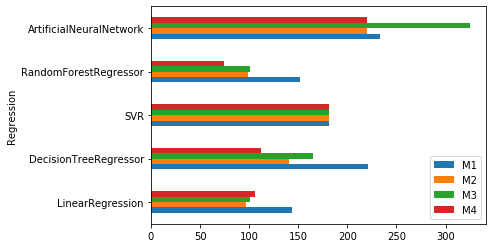

In [584]:
table_plot(tables, score='RMSE')

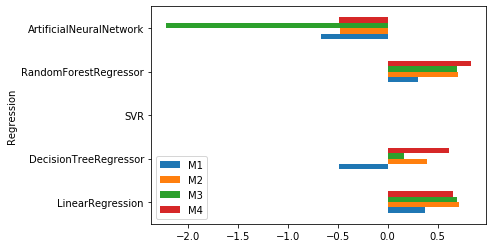

In [585]:
table_plot(tables, score='R2')

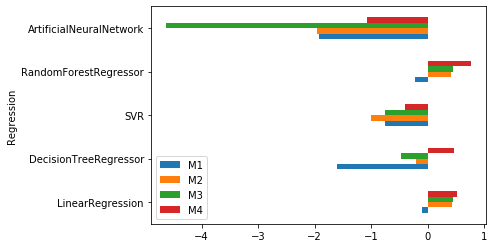

In [586]:
table_plot(tables, score='Adj_R2')

### Environments

In [582]:
def divide_by_year(s):
    
    s1 = s[s.YEAR==2009]
    s2 = s[s.YEAR==2010]
    s3 = s[s.YEAR==2011]
    s4 = s[s.YEAR==2012]
    s5 = s[s.YEAR==2013]
    
    return s1, s2, s3, s4 ,s5


def sales_plot(s, type='time'):
                
    if type == 'time':
        X = s.MON
        Y = ['s.ITEM_CNT', 's.PRICE', 's.MAXTEMP', 's.SALEDAY', 's.RAIN_DAY', 's.HOLIDAY']
        fig, ax = plt.subplots(3, 2, constrained_layout=True, )
        fig.suptitle(str(s.YEAR.iloc[0]), fontsize=20, color='blue')
        fig.set_figheight(10)
        fig.set_figwidth(10)

        idx = 0
        for row in range(3):
            for col in range(2):
                ax[row,col].plot(X, eval(Y[idx]))
                ax[row,col].set_title(Y[idx][2:])
                ax[row,col].grid(True)
                idx += 1

        plt.figure(figsize=(5.5, 14))
        plt.subplot(414)
        plt.plot(s.MON, s.QTY)
        plt.title("QTY")
        plt.grid(True)
        
    elif type == 'qty':
        X = ['s.ITEM_CNT', 's.PRICE', 's.MAXTEMP', 's.SALEDAY', 's.RAIN_DAY', 's.HOLIDAY', 's.MON']
        Y = s.QTY
        fig, ax = plt.subplots(4, 2, constrained_layout=True, )
        fig.suptitle(str(s.YEAR.iloc[0]), fontsize=20, color='blue')
        fig.set_figheight(10)
        fig.set_figwidth(10)

        idx = 0
        for row in range(4):
            for col in range(2):
                if idx < 7:
                    ax[row,col].scatter(eval(X[idx]), Y)
                    ax[row,col].set_title(X[idx][2:])
                    ax[row,col].grid(True)
                    idx += 1
                    
    else:
        print("You got a wrong type of plot")
        

def var_plot(s, var_name='ITEM_CNT'):
    
    s_div = divide_by_year(s)
    
    X = range(1, 13)    
    Y = [s_div[i].loc[:, var_name] for i in range(len(s_div))]
    title = s.YEAR.unique()
    
    fig, ax = plt.subplots(3, 2, constrained_layout=True, )
    fig.suptitle(var_name, fontsize=20, color='blue')
    fig.set_figheight(10)
    fig.set_figwidth(10)

    idx = 0
    for row in range(3):
        for col in range(2):
            if idx < 5:
                ax[row,col].plot(X, Y[idx])
                ax[row,col].set_title(title[idx])
                ax[row,col].grid(True)
            else:
                for i in range(len(Y)):
                    ax[row,col].plot(X, Y[i], label=title[i])
                ax[row,col].set_title("ALL")
                ax[row,col].legend(loc=2)
                ax[row,col].grid(True)
            idx += 1
            
            
def regression_results(model, y_true, y_pred):

    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error= metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    
    print('coefficients: ', *model.coef_)
    print('explained_variance: ', round(explained_variance, 4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error, 4))
    print('r2: ', round(r2, 4))
    print('MAE: ', round(mean_absolute_error, 4))
    print('MSE: ', round(mse, 4))
    print('RMSE: ', round(np.sqrt(mse), 4))
            
            
def view_table(regs):
    
    models = []
    rmse = []
    r2score = []
    adj_r2 = []
    
    for reg in regs:
        models.append(reg[0])
        rmse.append(reg[3])
        r2score.append(reg[4])
        adj_r2.append(reg[5])
    
    table = pd.DataFrame(zip(models, rmse, r2score, adj_r2), 
                         columns=['Regression', 'RMSE', 'R2', 'Adj_R2'], 
                         index=range(1, 6))
    
    table['RMSE'] = table['RMSE'].round(4)
    table['R2'] = table['R2'].round(4)
    table['Adj_R2'] = table['Adj_R2'].round(4)
    
    return table


def table_plot(tables, score='RMSE'):
    
    columns = ['M1', 'M2', 'M3', 'M4']
    
    if score == 'RMSE':
        t = tables.iloc[:,::3]
        t.columns = columns
        t.plot(kind='barh')
        
    elif score == 'R2':
        t = tables.iloc[:,1::3]
        t.columns = columns
        t.plot(kind='barh')
        
    elif score == 'Adj_R2':
        t = tables.iloc[:,2::3]
        t.columns = columns
        t.plot(kind='barh')
        
    else:
        print("Wrong score type!")
    

def apply_regs(x, y, x_test, y_test, model='lm'):
    
    """
        :Params: 
            X_train, Y_train, X_test, Y_test, model='model_type'
            
            @:model type:
                'lm'  :  LinearRegression
                'dt'  :  DecisionTreeRegressor
                'svm' :  SVR, SupportVectorRegressor
                'rf'  :  RandomForestRegressor  
                'ann' :  ArtificialNeuralNetwork
                
        :Returns:
            Full_model_name, Model, Predictions, RMSE-value, R2-score, Adj_R2-score
    """
    
    if model == 'ann':
        
        m = Sequential()
        
        m.add(Dense(64, input_shape=x_train.shape[1:], activation='relu'))
        m.add(Dense(64, activation='relu'))
        m.add(Dense(32, activation='relu'))
        m.add(Dense(16, activation='relu'))
        m.add(Dense(1))
        m.summary()

        m.compile(loss='mean_squared_error', 
                  optimizer=rmsprop(lr=0.0001, decay=0.0001), 
                  metrics=['accuracy'])
        
        m.fit(x, y, epochs=2000)
        m_name = 'ArtificialNeuralNetwork'
        
    else:
        
        try:
            if model == 'lm':
                m = LinearRegression()
            if model =='dt':
                m = DecisionTreeRegressor()
            if model =='svm':
                m = SVR()
            if model =='rf':
                m = RandomForestRegressor()
            
            m.fit(x, y)
            m_id = m.__str__()
            m_name = m_id[:m_id.find('(')]
    
        except:
            raise ExceptionError("ML model is not correct!, plz confirm the type of model")
        
    predictions = m.predict(x_test)
    rmse = math.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    n, p = len(x_test), len(x_test[0])
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
        
    return m_name, m, predictions, rmse, r2, adj_r2

